# Answering 

> # Topic Number = 9 ,8, 7, AND 6

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import pythainlp

In [2]:
from wordcloud import WordCloud 
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize # ใช้ในการตัดคำ
from pythainlp.corpus import thai_stopwords
from pythainlp.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words
from stop_words import get_stop_words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [4]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [5]:
Data = pd.read_excel("law_data_real.xlsx", header=[0])

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\LENOVO\miniconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\LENOVO\miniconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\LENOVO\miniconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in 

In [6]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...  
...                                                  ...  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...  

[12696 rows x 2 columns]

In [7]:
import nltk
nltk.download('words')
th_stop = ' '.join(list(thai_stopwords()))
#th_stop = tuple(thai_stopwords('thai'))
en_stop = tuple(get_stop_words('en'))
p_stemmer = PorterStemmer()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [8]:
def split_word(text):
     
    tokens = word_tokenize(text,engine='newmm')
   # url = "https://api.aiforthai.in.th/tlexplus"
    #headers = {'Apikey': "TcFxpsM6D7Hen9iWO5CnvHlNv8fsyBwW"}
    #data = {'text':text}
   # respons = requests.post(url, data=data ,headers=headers)
    #tokens = respons.json()['tokens']
    #data_all.append(data1.json()['tokens'])

    # Remove stop words ภาษาไทย และภาษาอังกฤษ
    tokens = [i for i in tokens if not i in th_stop and not i in en_stop]
    
    # หารากศัพท์ภาษาไทย และภาษาอังกฤษ
    # English
    tokens = [p_stemmer.stem(i) for i in tokens]
    
    # Thai
    tokens_temp=[]
    for i in tokens:
        w_syn = wordnet.synsets(i)
        if (len(w_syn)>0) and (len(w_syn[0].lemma_names('tha'))>0):
            tokens_temp.append(w_syn[0].lemma_names('tha')[0])
        else:
            tokens_temp.append(i)
    
    tokens = tokens_temp
    
    # ลบตัวเลข
    tokens = [i for i in tokens if not i.isnumeric()]
    
    # ลบช่องว่าง
    tokens = [i for i in tokens if not ' ' in i]

    return tokens

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> ## TF-IDF Question

In [9]:
data_Q = []

#tokens_list = [split_word(txt) for txt in clean_text]
for i in range(len(Data)):
    tokens_list = split_word(Data["คำถาม"][i])
    data_Q.append(tokens_list)
    #time.sleep(0.5)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
data_Q 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['ชำระหนี้', 'บัตรเครดิต', 'กู้', 'ไฟแนนซ์'],
 ['หนู',
  'มีปัญหา',
  'ตอนนี้',
  'มีลูก',
  'แฟน',
  'จดทะเบียนสมรส',
  'แฟน',
  'ค่าเลี้ยงดู',
  'ลูก',
  'มีลูก',
  'มีลูก',
  'ผู้หญิง',
  'ปัจจุบันนี้',
  'ยังอยู่',
  'หนู',
  'ทราบ',
  'แฟน',
  'ค่าเลี้ยงดู',
  'ทนาย',
  'ฃ่วย',
  'ตอนนี้',
  'หนู',
  'รับผิดชอบ',
  'ลูก',
  'คนเดียว',
  'ให้คำปรึกษา',
  'นะคะ'],
 ['รบกวน',
  'อาจารย์',
  'เรียน',
  'อังกฤษ',
  'กฎหมาย',
  'อาจารย์',
  'คำถาม',
  'เรื่อง',
  'กฎหมาย',
  'ที่ดิน',
  'เรียน',
  'เฉลย',
  'รบกวน',
  'อาจารย์',
  'ตอบ',
  'ข้อสงสัย',
  'คนต่างชาติ',
  'เจ้าของที่ดิน',
  'ในประเทศ',
  'ไท',
  'เพราะอะไร',
  'คนต่างแดน',
  'เจ้าบ้าน',
  'เช่า',
  'ไท',
  'คนต่างแดน',
  'มี',
  'ในประเทศ',
  'ไท',
  'คนต่างแดน',
  'ครอบครอง',
  'จำนอง',
  'ที่ดิน',
  'ไท',
  'ผู้ถือหุ้น',
  'คนต่างแดน',
  'เจ้าของที่ดิน',
  'ไท',
  'ขอโทษ',
  'คำถาม',
  'แปลก',
  'คำถาม',
  'อิ๊ง',
  'คอย',
  'เก่ง',
  'ขอความกรุณา',
  'อาจารย์',
  'วินิจฉัย',
  'สรุป',
  'ตัวบท',
  'เลข',
  'มาตรา',
  '

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

tokens_list_j = [','.join(tkn) for tkn in data_Q]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat = cvec.fit_transform(tokens_list_j)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\LENOVO\miniconda3\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [13]:
bag_Q = cvec.vocabulary_

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(analyzer=lambda x:x.split(','),)
t_feat = tvec.fit_transform(tokens_list_j)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
test_f = t_feat.todense()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> ## TF-IDF Anwering

In [17]:
data_a = []

#tokens_list = [split_word(txt) for txt in clean_text]
for i in range(len(Data)):
    tokens_list_a = split_word(Data["คำตอบ"][i])
    data_a.append(tokens_list_a)
    #time.sleep(0.5)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
data_a 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['ชำระหนี้',
  'ติด',
  'ไฟแนนซ์',
  'เจ้าหนี้',
  'หนังสือรับรอง',
  'ชำระหนี้',
  'สมุด',
  'ฉบับ',
  'แนบ',
  'เอกสาร',
  'กู้',
  'การพิจารณา',
  'สินเชื่อ',
  'ไฟแนนซ์',
  'อนุมัติ'],
 ['ความจริง',
  'จดทะเบียนสมรส',
  'กบ',
  'แฟน',
  'แฟน',
  'สามีภรรยา',
  'ชอบด้วยกฎหมาย',
  'ปพพ',
  'มาตรา',
  'ดังนั้น',
  'แฟน',
  'รีเลชัน',
  'สามีภรรยา',
  'ปพพ',
  'มาตรา',
  'เฟ',
  'ตามกฎหมาย',
  'บุตรนอกสมรส',
  'กฎหมายแพ่ง',
  'พาณิชย์',
  'มาตรา',
  'บุตร',
  'ชอบด้วยกฎหมาย',
  'ทางแก้',
  'ทำตาม',
  'ปพพ',
  'มาตรา',
  'เด็ก',
  'บุตร',
  'ชอบด้วยกฎหมาย',
  'พ่อ',
  'พ่อ',
  'เเม่',
  'สมรส',
  'พ่อ',
  'จดทะเบียน',
  'บุตร',
  'ศาล',
  'พิพากษา',
  'บุตร',
  'ผัว',
  'ทำได้',
  'เจรจา',
  'แฟน',
  'ช่วย',
  'แบกรับ',
  'เลี้ยง',
  'บุตร',
  'ที่เกิด',
  'แฟน',
  'ความเห็นใจ',
  'แฟน'],
 ['ถือครอง',
  'เป็นไปตาม',
  'ประมวลกฎหมาย',
  'นพ',
  'หมวด',
  'มาตรา',
  'มาตรา',
  'ตรี',
  'หมวด',
  'มาตรา',
  'มาตรา',
  'เจ้าบ้าน',
  'เจ้าของ',
  'คอนโด',
  'คนต่างแดน',
  'ปัจจัย',
  'ข้อกำ

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

tokens_list_a = [','.join(tkn) for tkn in data_a]
cvec_a = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat_a = cvec_a.fit_transform(tokens_list_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\LENOVO\miniconda3\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [20]:
bag_a = cvec_a.vocabulary_

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec_a = TfidfVectorizer(analyzer=lambda x:x.split(','),)
t_feat_a = tvec_a.fit_transform(tokens_list_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- # FIT LDA MODEL 

> ### Topic Number = 9

- Anwering

In [22]:
lda_tfidf_a9 = LatentDirichletAllocation(9, random_state=0)
lda_tfidf_a9.fit(t_feat_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=9, random_state=0)

In [23]:
pyLDAvis.sklearn.prepare(lda_tfidf_a9, c_feat_a, cvec_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.151028  0.065961       1        1  29.778526
1      0.137147  0.088385       2        1  25.609413
2      0.123526 -0.117576       3        1  16.350030
5      0.033326  0.104477       4        1  12.771304
3      0.065746 -0.175543       5        1   8.995730
8     -0.096579  0.086883       6        1   3.429920
4     -0.065755 -0.002568       7        1   1.957388
7     -0.173060 -0.021965       8        1   0.607997
0     -0.175378 -0.028055       9        1   0.499693, topic_info=           Term         Freq        Total Category  logprob  loglift
4430        นาย  2377.000000  2377.000000  Default  30.0000  30.0000
5748       พนง.  1871.000000  1871.000000  Default  29.0000  29.0000
10232  เช่าซื้อ  1191.000000  1191.000000  Default  28.0000  28.0000
8396      สัญญา  2553.000000  2553.000000  Default  27.0000  27.0000
4824       บุตร  2143.000000  2143.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1017    ของเก่า     2.284739    17.801548   Topic9  -7.0902   3.2459
11068       เศษ     2.467447    29.262300   Topic9  -7.0133   2.8258
12077      โยธา     2.291816    25.283088   Topic9  -7.0871   2.8981
7979    ศาลแพ่ง     2.184276    25.556332   Topic9  -7.1352   2.8393
11603  แบบฟอร์ม     2.286929    43.218924   Topic9  -7.0892   2.3599

[553 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
0          1  0.079150          
0          2  0.079150          
0          3  0.079150          
0          4  0.079150          
0          5  0.079150          
...      ...       ...       ...
12551      2  0.006234  ไล่เบี้ย
12551      3  0.006234  ไล่เบี้ย
12551      4  0.012468  ไล่เบี้ย
12551      5  0.012468  ไล่เบี้ย
12551      6  0.006234  ไล่เบี้ย

[3132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 3, 6, 4, 9, 5, 8, 1])

In [25]:
topic_values_a9 = lda_tfidf_a9.transform(t_feat_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
Data['Topic_A9'] = topic_values_a9.argmax(axis=1)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  Topic_Q9  Topic_A9  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...         5         6  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...         7         1  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...         4         1  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...         3         5  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...         3         3  
...                                                  ...       ...       ...  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...         5         6  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...         3         6  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...         4         6  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...         5         6  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...         5         6  

[12696 rows x 4 columns]

In [41]:
Data['A9'] = Data['Topic_A9']+1

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
Data.drop(['Topic_A9'], 1, inplace=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  Topic_Q9  A9  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...         5   7  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...         7   2  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...         4   2  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...         3   6  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...         3   4  
...                                                  ...       ...  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...         5   7  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...         3   7  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...         4   7  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...         5   7  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...         5   7  

[12696 rows x 4 columns]

- Question

In [32]:
lda_tfidf9 = LatentDirichletAllocation(9, random_state=0)
lda_tfidf9.fit(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=9, random_state=0)

In [33]:
pyLDAvis.sklearn.prepare(lda_tfidf9, c_feat, cvec)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.197129 -0.040367       1        1  30.901726
7     -0.178280  0.160984       2        1  24.005720
3     -0.096372 -0.021506       3        1  19.035614
4     -0.077042 -0.051692       4        1  13.520884
6     -0.080219 -0.093161       5        1  10.440688
2      0.163781  0.013167       6        1   0.667496
0      0.156972  0.011491       7        1   0.526454
1      0.156039  0.011521       8        1   0.483688
8      0.152250  0.009565       9        1   0.417730, topic_info=          Term         Freq        Total Category  logprob  loglift
6347    บริษัท  3101.000000  3101.000000  Default  30.0000  30.0000
5512    ที่ดิน  3450.000000  3450.000000  Default  29.0000  29.0000
7352       ผัว  2438.000000  2438.000000  Default  28.0000  28.0000
8191       พ่อ  2575.000000  2575.000000  Default  27.0000  27.0000
1729       คดี  1520.000000  1520.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
4933    ถังขยะ     1.147486    14.864096   Topic9  -7.7500   2.9167
1760      คนจน     1.289401    49.963776   Topic9  -7.6334   1.8210
4845  ต้องห้าม     1.136913    14.179196   Topic9  -7.7593   2.9546
6300        บท     1.152031    45.506232   Topic9  -7.7461   1.8018
1099      กิ่ง     1.122219    42.544053   Topic9  -7.7723   1.8429

[542 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
0          1  0.123748      
0          2  0.123748      
0          3  0.123748      
0          4  0.123748      
0          5  0.123748      
...      ...       ...   ...
17252      1  0.006309  ไอซ์
17252      2  0.006309  ไอซ์
17252      3  0.006309  ไอซ์
17252      4  0.006309  ไอซ์
17252      5  0.971567  ไอซ์

[2537 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 4, 5, 7, 3, 1, 2, 9])

In [34]:
topic_values9 = lda_tfidf9.transform(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
Data['Topic_Q9'] = topic_values9.argmax(axis=1)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
Data['Q9'] = Data['Topic_Q9']+1

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  Topic_Q9  A9  Q9  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...         5   7   6  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...         7   2   8  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...         4   2   5  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...         3   6   4  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...         3   4   4  
...                                                  ...       ...  ..  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...         5   7   6  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...         3   7   4  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...         4   7   5  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...         5   7   6  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...         5   7   6  

[12696 rows x 5 columns]

In [46]:
Data.drop(['Topic_Q9'], 1, inplace=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  A9  Q9  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...   7   6  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2   8  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...   2   5  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...   6   4  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...   4   4  
...                                                  ...  ..  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7   6  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...   7   4  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...   7   5  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   7   6  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   7   6  

[12696 rows x 4 columns]

#### Number = 1

In [69]:
topic_a9 = Data[Data['A9'] == 1].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
topic_a9.groupby('Q9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9
4    2
5    3
6    8
7    5
8    2
dtype: int64

In [71]:
#เลือกเลข 6 
topic_QA1 = topic_a9[topic_a9['Q9'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
topic_QA1

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0  ทำไมเวลาโพสต์ข้อความผ่านโทรศัพท์มือถือเข้าโซเช...   
1  ถูกฟ้องแพ่งคดีต่ำสุดสูงสุดเจรจาผ่านทนายเจ้าหนี...   
2     ศาลแพ่งที่พิจารณาคดีแพ่งปัจจุบันมีกี่แห่งในกทม   
3  เมื่อกี้มีโทรศัทย์เบอร์โทรเข้านผมเลยโทรกลับไปถ...   
4  การกู้เงินระหว่างกรรมการกู้เงินบริษัทและบริษัท...   
5  โทดนะคะแล้วถ้าเอกสารขอสมัครสอบนั้นไม่ปลอมหล่ะค...   
6  หวัดดีผมมืปัญหาอยากปรึกษาเป็นข้อสงสัยว่าแบบนี้...   
7  บริษัทเริ่มก็ตั้งเมือ่ปีที่แล้วและวันที่พฤษภาค...   

                                               คำตอบ  A9  Q9  
0  โทรศัพท์มือถือแบบสมาร์ทโฟนที่สามารถรับส่งข้อมู...   1   6  
1  ดอกจันท์ดอกคงใส่แทนคำว่ายืมเงินใช่ไหมแหมผมล่ะง...   1   6  
2  น่าจะมีแห่งคือศาลแพ่งและศาลแพ่งกรุงเทพใต้เดิมค...   1   6  
3                      เรื่องเล็กน้อยปล่อยไปก่อนเถอะ   1   6  
4                              ใช้แบบฟอร์มทั่วๆไปได้   1   6  
5                                             ไม่ผิด   1   6  
6  เห็นว่ากรณีนี้ไม่ถือว่าเป็นการกีดกันทางการค้าแ...   1   6  
7  ถ้ามีระเบียบของบริษัทระบุไว้ก็หักไว้ได้ถ้าเป็น...   1   6

- หัวข้อที่ผ่านเกณฑ์คัดเลือก มี 5 หัวข้อ ได้แก่ 2 , 3 , 6 , 7 และ 9

#### Number = 2 

In [48]:
topic_a2 = Data[Data['A9'] == 2].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
len(topic_a2)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3129

In [50]:
topic_a2.groupby('Q9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9
1       2
2       5
3       3
4     576
5     114
6     193
7     120
8    2114
9       2
dtype: int64

In [51]:
#เลือกเลข 8 
topic_QA2 = topic_a2[topic_a2['Q9'] == 8].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
topic_QA2

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0     หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
1     กราบเรียนอาจารย์เดชาที่เคารพนับถืออย่างสูงดิฉั...   
2     คือผมกับแฟนอะคบกันมาตั้งอายุตอนนี้แฟนผมอายุแล้...   
3     จับได้ว่าภรรยามีชายชู้และมาขอหย่าโดยต้องการนำบ...   
4     ดิฉันแต่งงานอยู่กับสามีมาได้ประมาณปีมีลูกคนช่ว...   
...                                                 ...   
2109  เรียนปรึกษาดังนี้เนื่องจากเมื่อคุณย่าเสียและไม...   
2110  กรณีพ่อเสียชิวิตและไม่ได้ทำพินัยกรรมไว้โดยพ่อเ...   
2111  ขอคำปรึกษาหน่อยคะน้องชายอายุปีคบกับฝ่ายหญิงอาย...   
2112  ผมได้คบกับผู้หญิงคนหนึ่งอายุปีและได้มีอะไรกับเ...   
2113  เจ้าของทรัพย์เสียชีวิตมีภรรยาที่จดทะเบียนสมรสแ...   

                                                  คำตอบ  A9  Q9  
0     จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2   8  
1     สามีไม่เข้าเหตุฟ้องหย่าเข้าเหตุหย่าตามปพพมาตรา...   2   8  
2     ไม่มีความผิดเนื่องจากอายุเกินปีแล้วตามปอมาตราต...   2   8  
3     ไม่ฟ้องศาลต้องไปขอหย่าที่สำนักงานเขตหรือที่ว่า...   2   8  
4     หากคุณทนกับพฤติกรรมอันเลวร้ายของสามีไม่ได้ควรห...   2   8  
...                                                 ...  ..  ..  
2109  ถ้าคุณพ่อดิฉันไม่ยินยอมเข้าร่วมเซ็นชื่อในคำร้อ...   2   8  
2110  ทรัพย์สินของพ่อก่อนแต่งงานตอบเป็นสินส่วนตัวของ...   2   8  
2111  ถ้าฝ่ายหญิงมาหาน้องชายที่บ้านเองโดยที่ไม่ได้นั...   2   8  
2112  ถ้าผมยินดีช่วยเหลือดูแลค่าใช้จ่ายในบางส่วนแต่ไ...   2   8  
2113  เจ้ามรดกเสียชีวิตมีภรรยาที่จดทะเบียนสมรสแต่ไม่...   2   8  

[2114 rows x 4 columns]

#### Number = 3

In [53]:
topic_a3 = Data[Data['A9'] == 3].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
topic_a3.groupby('Q9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9
1       5
2       4
3       4
4     294
5     111
6     407
7    1056
8     138
9       2
dtype: int64

In [55]:
#เลือกเลข 7
topic_QA3 = topic_a3[topic_a3['Q9'] == 7].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
topic_QA3

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0     เรียนทางท่านทนายโปรดให้ความกระจ่างด้วยเนื่องจา...   
1     คือน้องชายมีเรื่องทะเลาะวิวาทและโดนโจทย์แจ้งข้...   
2     กระผมว่าด้วยสำนักงานแห่งหนึ่งได้ออกคำสั่งจังหว...   
3     อยากทราบว่าเมื่อโดนจับในคดีรับซื้อของโจรต้องทำ...   
4     เนื่องจากในปีขณะนั้นน้องชายมีอายุปีได้ถูกจับใน...   
...                                                 ...   
1051  ในการลักทรัพย์นายจ้างนั้นถ้าจำเลยได้ยอมรับผิดว...   
1052  ถามวาตามกฎหมายแล้วบทลงโทษของการมีอาวุธปืนขนาดช...   
1053  สิ้นเดือนนี้อัยการฟ้องผมแล้วข้อหาอนาจารบุคคลอา...   
1054  พนักงานสอบสวนแจ้งข้อเท็จจริงเกี่ยวกับการกระทำท...   
1055  เพื่อนโดนคดีลักทรัพย์โดนเข้าช่องทางที่ไม่ใช่ปร...   

                                                  คำตอบ  A9  Q9  
0     ฟ้องคุณอาวีวอลตามสัญญาเช่าเห็นควรหาทนายความเข้...   3   7  
1     ให้นำบันทึกการจับกุมเข้ามาพบทนายความที่สำนักงา...   3   7  
2     ไม่ได้เพราะถือว่าบุคคลดังกล่าวขาดคุณสมบัติในกา...   3   7  
3     ยอมรับสาราภพศาลสั่งจำคุกหาทนายยื่นคำร้องขอให้ร...   3   7  
4     คดีถึงที่สุดไม่สามารถฎีกาได้แล้วยกเว้นได้รับอน...   3   7  
...                                                 ...  ..  ..  
1051  แม้จะลักทรัพย์ไม่มากเท่าที่นายจ้างกล่าวหาความผ...   3   7  
1052  แม้เป็นปืนประดิษฐ์เองก็มีโทษจำคุกปีส่วนพืชกระท...   3   7  
1053                แจ้งศาลให้ตั้งทนายให้ได้ตามปวิอาญาม   3   7  
1054  เมื่อถูกกล่าวและถูกฟ้องร้องดำเนินคดีก็จำเป็นต้...   3   7  
1055  เราโดนนายประกันหลอกเอาเงินหรือป่าวตอบตอบไม่ได้...   3   7  

[1056 rows x 4 columns]

#### Number = 4

In [73]:
topic_a4 = Data[Data['A9'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
topic_a4.groupby('Q9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9
1      2
2      3
4    382
5    121
6    269
7    245
8     88
9      1
dtype: int64

In [76]:
#เลือกเลข 4
topic_QA4 = topic_a4[topic_a4['Q9'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
topic_QA4

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0    เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
1    เนื่องด้วยดิฉันมีปัญหาข้องใจว่าเราจะสามารถกระท...   
2    พอดีคุนเพื่อนเข้าเขียนคำหยาบคายลงในเว็ปไซด์บาง...   
3    ในกรณีถูกรถชนเราเข้ารักษาพยาบาลที่โรงพยาลค่ารั...   
4    ปัญหาเกี่ยวกับข้างบ้านส่งเสียงดังข้างบ้านผมได้...   
..                                                 ...   
377  เหตุคือว่าแม่ของดิฉันไปให้อาหารหมาหลังรถบ้านตร...   
378  วันที่มกราคมผมขบรถกลับบ้านจากไปทำงานเวลานมองไม...   
379  ข้างบ้านทำเป็นสถานธรรมไม่ทราบว่าจะตรวจสอบว่าถู...   
380  หากว่าผูัรับเหมาโครงการรัฐผู้จ่ายเงินตามใบเสร็...   
381  รถโดยสารประจำทางสองแถววิ่งจากตัวเมืองจันทบุรีไ...   

                                                 คำตอบ  A9  Q9  
0    หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...   4   4  
1    คุณควรฟ้องผู้กระทำความผิดเป็นคดีอาญาด้วยตนเองโ...   4   4  
2    คำหยาบถ้าไปด่าเขาก็ผิดแค่ดูหมิ่นมีความผิดตามปอ...   4   4  
3    ควรไปแจ้งความและให้ตำรวจดำเนินคดีและส่งฟ้องฟ้อ...   4   4  
4    ให้ทนายความยื่นโนติสให้เขตดำเนินการภายในวันหาก...   4   4  
..                                                 ...  ..  ..  
377  ก็เป็นความผิดลหุโทษอย่าเสียเวลาไปคิดดำเนินคดีก...   4   4  
378  ก็เป็นการขับรถในลักษณะกีดขวางการจราจรตามพรบจรจ...   4   4  
379  ไม่มีกฎหมายควบคุมเรื่องนี้ไว้โดยเฉพาะเขาจึงสาม...   4   4  
380  เจ้าพนักงานยักยอกถ้าผู้จ่ายเงินเป็นเจ้าหน้าที่...   4   4  
381  พนักงานขับรถมีความผิดหรือไม่ถ้าส่งฟ้องแล้วจะเป...   4   4  

[382 rows x 4 columns]

#### Number 5 

In [78]:
topic_a5 = Data[Data['A9'] == 5].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
topic_a5.groupby('Q9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9
3      1
4    100
5     35
6     50
7     25
8     67
dtype: int64

In [80]:
#เลือกเลข 4
topic_QA5 = topic_a5[topic_a5['Q9'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
topic_QA5

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0   บ้านผมเป็นที่ตาบอดและใช้ถนนที่ใกล้เคียงเข้าออก...   
1   เรายืมกล้องดิจิตอนเขามาราคากล้องก็ประมาณในตอนแ...   
2   ผมไปเที่ยวที่ปายแม่ฮ่องสอนกับบริษัททัวว์แล้วรถ...   
3   ผมมีคดีความทำร้ายร่างกายมีเรื่องชกต่อยกันระหว่...   
4   คืองี้เย็นวันหนึ่งนายกกับนางสาวขไปทานข้าวเย้นด...   
..                                                ...   
95  ขอคำปรึกษาเหตุเกิดเมื่อเมาายนพี่เขยและครอบครัว...   
96  เราเลี้ยงหมาตั้งแต่มันตัวเล็กๆจนมันตัวโตเลี้ยง...   
97  สวัสดเมื่อวันที่เราโดนรถบจส่งของแห่งหนึงชนแล้ว...   
98  ที่พักอาศัยของผมเป็นหอพักอยู่ติดกับบ้านเรือนมี...   
99  รบกวนสอบถามตอนเกิดเหตุได้แจ้งประกันของเรามาตรว...   

                                                คำตอบ  A9  Q9  
0   ต้องลองทำหนังสือถึงเทศบาลดูเกี่ยวกับการเปิดทาง...   5   4  
1   แนะนำให้คุณเจรจากับเจ้าของกล้องดูและขอลดราคากล...   5   4  
2   ต้องฟ้องบริษัททัวร์เพื่อเรียกร้องค่าเสียหายหรื...   5   4  
3   อันตรายสาหัสจากปอมาตราได้บัญญัติเป็นความผิดว่า...   5   4  
4   กรณีที่คุณแอบไปกอดและหอมแก้มนางสาวขในกรณีที่นา...   5   4  
..                                                ...  ..  ..  
95  อุบัติเหตุนอกจากค่ารักษาพยาบาลที่เรียกร้องได้แ...   5   4  
96  หมากัดจริงหรือไม่เป็นข้อเท็จจริงที่ต้องพิสูจน์...   5   4  
97  ค่าสินไหมทดแทนถ้าคู่กรณีเป็นฝ่ายประมาทก็เรียกค...   5   4  
98  เป็นการละเมิดเป็นความรับผิดทางแพ่งก่อนอื่นก็ใช...   5   4  
99  ถ้าคู่กรณีไม่ยอมชดใช้ค่าเสียหายให้กับเราเราสาม...   5   4  

[100 rows x 4 columns]

#### Number = 6

In [57]:
topic_a6 = Data[Data['A9'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
topic_a6.groupby('Q9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9
2      1
4     72
5    945
6    156
7     34
8     19
9      1
dtype: int64

In [59]:
#เลือกเลข 5 
topic_QA6 = topic_a6[topic_a6['Q9'] == 5].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
topic_QA6

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0    เนื่องจากบริษัทได้ออกระเบียบในส่วนของพนักงานขา...   
1    บริษัทเอกชนออกแบบตกแต่งพนักงานอายุปีอายุงานปีถ...   
2    ทางบริษัทจะออกกฏระเบียบใหม่ว่าด้วยการเมาแล้วขั...   
3    บริษัททำธุรกิจนำเข้าจัดจำหน่ายอุปกรณ์คอมพิวเตอ...   
4    ทำโอหลังทุ่มเราต้องทำชดเชยเวลาที่พักตอนโมงด้วย...   
..                                                 ...   
940  ถ้าเราจะลาออกจากบริษัทต้องทำตามกฎใหมคือบริษัทบ...   
941  คือเพื่อนดิฉันเขาทำงานให้บริษัทการ์เม้นแห่งนึง...   
942  ที่ทำงานมีวันหยุดประจำปีให้วันไม่มีให้ลากิจลาป...   
943  วันที่พยนายจ้างเรียกตัวเข้าไปพบแล้วคุยกับเราเก...   
944  การที่เราไม่มีสัญญาจ้างงานแต่ก้มีการจ่ายเงินเด...   

                                                 คำตอบ  A9  Q9  
0    สัญญาจ้างการออกข้อบังคับเกี่ยวกับการทำงานระเบี...   6   5  
1    ฟ้องได้ถ้ามีเงินเดือนค้างจ่ายฟ้องได้ฟ้องได้ถ้า...   6   5  
2    นอกเวลางานไม่ผิดนอกสถานที่ทำงานแต่ในเวลางานผิด...   6   5  
3    ถ้าครบปีตามสัญญาก็ไม่ต้องจ่ายถ้าเลิกจ้างก่อนต้...   6   5  
4    ในกรณีที่นายจ้างให้ลูกจ้างทำงานล่วงเวลาต่อจากก...   6   5  
..                                                 ...  ..  ..  
940  ก็ควรแจ้งล่วงหน้าวันถ้าไปออกก่อนกำหนดถ้านายจ้า...   6   5  
941  ในกรณีนี้เพื่อนดิฉันจะได้ค่าชดเชยหรือไม่และต้อ...   6   5  
942  เรื่องที่คุณถามนั้นมีคำตอบไว้ชัดเจนในพรบคุ้มคร...   6   5  
943  เมื่อบอกกล่าวล่วงหน้าและจ่ายค่าชดเชยวันกรณีทำง...   6   5  
944  เพียงตกลงด้วยวาจาก็ถือเป็นการจ้างแล้วการเลิกจ้...   6   5  

[945 rows x 4 columns]

#### Number = 7

In [61]:
topic_a7 = Data[Data['A9'] == 7].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
topic_a7.groupby('Q9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9
1       2
2       6
3       4
4     760
5     250
6    2534
7     209
8     724
9       2
dtype: int64

In [63]:
#เลือกเลข 6 
topic_QA7 = topic_a7[topic_a7['Q9'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
topic_QA7

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0     ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1     พวกเต็นมันซื้อรถดาวน์ผมบาทบอกผมว่าจะปิดบัญชีแล...   
2     ถ้าทรัพย์นั้นทางธนาคารมาประกาศขายเองถือว่าเป็น...   
3     เมื่องานได้จองรถกับบริษัทหนึ่งโดยตกลงกับว่าออก...   
4     ผมได้ตอบตกลงทำประกันทางโทรศัพท์เขาโทรมาหว่านล้...   
...                                                 ...   
2529  คือกู้เงินซื้อบ้านกับธอสดิฉันเป็นผู้กู้หลักทำง...   
2530  เรียนท่านทนายที่เคารพผมขอปรึกษาดังนี้ได้มีจดหม...   
2531  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
2532  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
2533  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                  คำตอบ  A9  Q9  
0     หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...   7   6  
1     คุณสามารถฟ้องเป็นคดีผู้บริโภคได้เมื่อเต็นท์ไม่...   7   6  
2     มึสิทธิเข้าประมูลซื้อได้แล้วแต่นโยบายของธนาคาร...   7   6  
3     คุณสามารถฟ้องเป็นคดีผู้บริโภคได้ไม่ต้องเสียค่า...   7   6  
4     ถ้าไม่อยากทำก็สามารถแจ้งยกเลิกได้ส่วนคำถามที่ว...   7   6  
...                                                 ...  ..  ..  
2529  ถ้าเราไม่ต้องการบ้านเรามีวิธีไหนให้มีผลกระทบกั...   7   6  
2530  ผมในฐานะค้ำประกันจะต้องดำเนินการอย่างไรตอบต้อง...   7   6  
2531  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7   6  
2532  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   7   6  
2533  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   7   6  

[2534 rows x 4 columns]

#### Number =  8

In [82]:
topic_a8 = Data[Data['A9'] == 8].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
topic_a8.groupby('Q9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9
3     1
4    13
5    10
6     4
7     5
8     8
9     2
dtype: int64

In [84]:
#เลือกเลข 4 
topic_QA8 = topic_a8[topic_a8['Q9'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
topic_QA8

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0   ซื้อบ้านบแลนด์เฮ้าส์กำหนดชำระคาส่วนกลางเป็นตาม...   
1   หลานชายของเพื่อนบ้านข้างเคียงแต่งรถซ่อมเครื่อง...   
2   เมื่อวันพฤหัสบดีที่เวลาโดยประมาณมีชายไม่ทราบชื...   
3   ++การจัดเก็บค่าส่วนกลางมบมีวิธีอื่นหรือไม่!นอก...   
4   ผมเป็นเจ้าของพื้นที่ในอาคารชุดแห่งหนึ่งเนื้อที...   
5   รบกวนถามหน่อยพอดีว่าซื้อคอนโดแบบห้องนอนพทประมา...   
6   เรียนปรึกษาเกี่ยวกับโครงการบ้านจัดสรรด้วยคือใน...   
7   การยกเลิกนิติบุคคลหมู่บ้านจัดสรรต้องทำอย่างไรบ...   
8   อยากทราบกฎหมายเกี่ยวกับสีรถยนต์และกรณีที่สีตัว...   
9   ดิฉันมีเรื่องดังนี้คือเมื่อวันที่กันยายนดิฉันไ...   
10  ซื้อตึกแถวมาปีแล้วโดยด้านหลังตึกแถวเป็นที่จอดร...   
11  เช่าห้องพักแถวอินทามระตั้งแต่พยทนเสียงดังจากห้...   
12  อยากจะทราบวิธีจัดการกะฝ่ายชายชนิดดิ้นไม่หลุดผู...   

                                                คำตอบ  A9  Q9  
0   ค่าส่วนกลางและข้อบังคับในการเรียกเก็บนั้นต้องไ...   8   4  
1   ร้องเรียนไปที่สำนักงานเขตหรืออำเภอหากไม่ดำเนิน...   8   4  
2   ท่านสามารถร้องเรียนและร้องขอความเป็นธรรมได้ที่...   8   4  
3   การจัดเก็บค่าส่วนกลางย่อมเป็นหน้าที่ของนิติบุค...   8   4  
4   เมื่อท่านเห็นว่าค่าส่วนกลางที่ทางนิติบุคคลอาคา...   8   4  
5   เมื่อระเบียบหรือข้อบังคับดังกล่าวที่จัดให้มีกา...   8   4  
6   ขอแนะนำให้ไปศึกษาพรบอาคารชุดพศในห้องสมุดของกฎห...   8   4  
7   ขอแนะนำให้ไปศึกษาพรบอาคารชุดพศในห้องสมุดของกฎห...   8   4  
8   ลองไปศึกษาพรบรถยนต์พศและกฎกระทรวงที่เกี่ยวข้อง...   8   4  
9   ก็คงฟ้องข้อหาหมิ่นประมาทคุณก็ใจร้อนหึงหวงจนเกิ...   8   4  
10                       ติดต่อสคบให้ช่วยเหลือสายด่วน   8   4  
11                         ร้องสคบให้ช่วยเหลือสายด่วน   8   4  
12  การเผยแพร่ภาพลามกอนาจารก็เก็บรวบรวมพยานหลักฐาน...   8   4

#### Number = 9

In [65]:
topic_a9 = Data[Data['A9'] == 9].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
topic_a9.groupby('Q9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9
2      1
3      1
4    112
5     20
6    221
7      2
8     18
dtype: int64

In [67]:
#เลือกเลข 6 
topic_QA9 = topic_a9[topic_a9['Q9'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
topic_QA9

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0    อยากทราบว่ารถผมค้างส่งอยู่งวดไฟแนนซ์มีสิทธิ์มา...   
1    ผู้เช่าชำระมัดจำทำสัญญาอยู่บ้านเป็นเวลาปีแต่ใน...   
2    อยากทราบว่าถ้าชาวต่างชาติสั่งทำสินค้าประเภทของ...   
3    ลูกหนี้กู้เงินบาทแล้วไม่มีเงินจ่ายและนำของชิ้น...   
4    อยากปรึกษาเรื่องโดนจดหมายส่งมาที่บ้านให้ชำระสม...   
..                                                 ...   
216  คื่อเรื่องมีอยู่ว่าผมไปเช่าหอพักแห่งหนึ่งโดยจ่...   
217  อยากเรียนถามว่าการเช่าซื้อรถเก๋งเพื่อใช้ในกิจก...   
218  คือผมไปดาวมอใซค์ช่วงนั้นผมขัดสนเงินจึงได้นำเอา...   
219  รบกวนพี่ๆหน่อยนะคะพอดีคุณพ่อหนูกะเพื่อนพ่อทำหน...   
220  ให้เช่าที่ดินเป็นจำนวนไร่โดยให้สัญญาเช่าปีแต่ต...   

                                                 คำตอบ  A9  Q9  
0    ไม่ได้เพราะขัดต่อประกาศคณะกรรมการว่าด้วยสัญญาข...   9   6  
1    หากในสัญญาระบุระยะเวลาการเช่าปีหากผู้เช่าผิดสั...   9   6  
2    หากผู้สั่งซื้อไม่ยอมรับสินค้าท่านสามารถนำใบสั่...   9   6  
3    ตามหลักกฎหมายเรื่องการเช่าซื้อตามปพพมาตรากรรมส...   9   6  
4    คุณควรทำหนังสือเป็นลายลักษณ์อักษรแจ้งไปยังฟิตแ...   9   6  
..                                                 ...  ..  ..  
216  ท่านควรต้องดูที่ข้อตกลงในครั้งแรกในการเช่าหอพั...   9   6  
217  การเช่าซื้อรถยนต์สามารถนำไปลดหย่อนหักเป็นค่าใช...   9   6  
218  กรณีมีสัญญาเช่าซื้อถือว่าเป็นคดีแพ่งผู้ให้เช่า...   9   6  
219  เมื่อไม่มีกำหนดระยะเวลาการเช่าไว้ฝ่ายหนึ่งฝ่าย...   9   6  
220  เห็นว่าประมวลกฎหมายแพ่งและพาณิชย์มาตรา๕๖๙บัญญั...   9   6  

[221 rows x 4 columns]

> - คัดเลือกเหลือ Number 2 , 3 , 4, 6 และ 7

>- จำนวน 5 Classes

In [86]:
len(topic_QA2) + len(topic_QA3) + len(topic_QA4) + len(topic_QA6) + len(topic_QA7)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7031

In [87]:
num9 = pd.concat([topic_QA2, topic_QA3, topic_QA4, topic_QA6, topic_QA7],axis=0).reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
num9 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0     หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
1     กราบเรียนอาจารย์เดชาที่เคารพนับถืออย่างสูงดิฉั...   
2     คือผมกับแฟนอะคบกันมาตั้งอายุตอนนี้แฟนผมอายุแล้...   
3     จับได้ว่าภรรยามีชายชู้และมาขอหย่าโดยต้องการนำบ...   
4     ดิฉันแต่งงานอยู่กับสามีมาได้ประมาณปีมีลูกคนช่ว...   
...                                                 ...   
7026  คือกู้เงินซื้อบ้านกับธอสดิฉันเป็นผู้กู้หลักทำง...   
7027  เรียนท่านทนายที่เคารพผมขอปรึกษาดังนี้ได้มีจดหม...   
7028  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
7029  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
7030  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                  คำตอบ  A9  Q9  
0     จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2   8  
1     สามีไม่เข้าเหตุฟ้องหย่าเข้าเหตุหย่าตามปพพมาตรา...   2   8  
2     ไม่มีความผิดเนื่องจากอายุเกินปีแล้วตามปอมาตราต...   2   8  
3     ไม่ฟ้องศาลต้องไปขอหย่าที่สำนักงานเขตหรือที่ว่า...   2   8  
4     หากคุณทนกับพฤติกรรมอันเลวร้ายของสามีไม่ได้ควรห...   2   8  
...                                                 ...  ..  ..  
7026  ถ้าเราไม่ต้องการบ้านเรามีวิธีไหนให้มีผลกระทบกั...   7   6  
7027  ผมในฐานะค้ำประกันจะต้องดำเนินการอย่างไรตอบต้อง...   7   6  
7028  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7   6  
7029  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   7   6  
7030  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   7   6  

[7031 rows x 4 columns]

In [92]:
num9.groupby('A9').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A9
2    2114
3    1056
4     382
6     945
7    2534
dtype: int64

# Visualization

In [90]:
import matplotlib.pyplot as plt

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 5 artists>

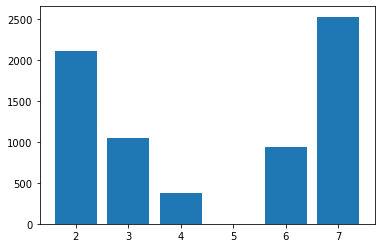

In [95]:
#คำตอบ
data9 = num9['A9'].value_counts()

fig, ax = plt.subplots()
ax.bar(data9.index, data9.values)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 5 artists>

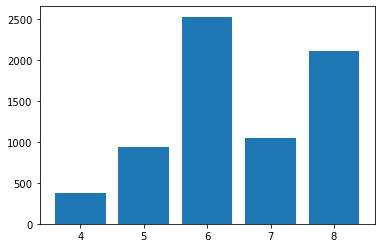

In [98]:
#คำถาม
dataQ9 = num9['Q9'].value_counts()

fig, ax = plt.subplots()
ax.bar(dataQ9.index, dataQ9.values)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

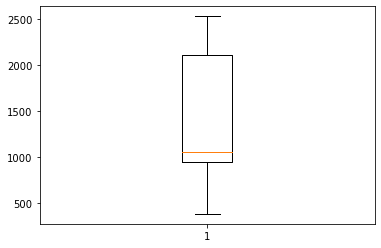

In [107]:
plt.boxplot(dataQ9)
plt.show

In [99]:
topic_QA2.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
1972      ต้องการแบ่แยกแต่ถ้าทางพี่ชายไม่ยอมต้องทำยังไง   
283   เด็กชายอายุปีและเด็กหญิงอายุปีฝ่ายหญิงเกิดตั้ง...   
1655  เรียนถามทนายคือบิดาผมได้เสียชีวิตไปเมื่อปีที่แ...   
1640  ในกรณีที่เจ้ามรดกก่อนตายได้พาลูกที่มีชีวิตอยู่...   
568   มีอยู่ว่าฉันอยู่กินกับสามีมาปีแล้วและได้ส่งให้...   
1221  เนื่องจากแฟนดิฉันและตัวดิฉันได้ซื้อบ้านไว้ที่โ...   
85    ผมมีเรื่องรบกวนถามผมอยู่กับภรรยาประมาณปีจดทะเบ...   
753      ภรรยาเป็นต่างด้าวเลิกกันกันแล้วลูกจะเป็นของใคร   
1556  ลุงกับป้าดิฉันอยู่กินกันมาประมาณปีพอมาช่วงหลัง...   
1519  คือว่าปู่ผมเสียแต่มรกดกยังไม่ได้แบ่งหาใครแต่ชื...   

                                                  คำตอบ  A9  Q9  
1972  เห็นว่าประมวลกฎหมายแพ่งและพาณิชย์ได้บัญญัติเรื...   2   8  
283   การกระทำของฝ่ายชายย่อมเป็นความผิดเกี่ยวกับเพศฐ...   2   8  
1655  ในฐานะผู้จัดการมรดกคุณสามารถโอนบ้านที่เป็นมรดก...   2   8  
1640  เมื่้อยังไม่จดทะเบียนโอนเมื่อเจ้าของเสียชีวิตท...   2   8  
568   การหย่าโดยความยินยอมจะสมบูรณ์ต่อเมื่อสามีและภร...   2   8  
1221  ทำเรื่อง้ซื้อบ้านก่อนสมรสผู้้ร่วมย่อมมีสิทธิ์ใ...   2   8  
85    สามารถฟ้องหย่าได้ตามปพพมาตราต้องส่งเสียค่าเลี้...   2   8  
753   บุตรซึ่งยังไม่บรรลุนิติภาวะต้องอยู่ภายใต้อำนาจ...   2   8  
1556  มาตราเหตุฟ้องหย่ามีดังต่อไปนี้สามีอุปการะเลี้ย...   2   8  
1519  ให้ทายาทของปู่เช่นลูกๆของปู่หรือทายาทผู้มีสิทธ...   2   8

In [100]:
topic_QA3.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
977  คือผมโดนคดีมีกัญชาของเพื่อนไว้ไนครอบครองแค่กรั...   
303  ศาลชั้นต้นยกฟ้องยกขาดเลยอัยการยื่นอุทรณ์ค้านถ้...   
333  เพื่อนโดนตำรวจจับคดียาบ้าโดยตำรวจตั้งข้อหามียา...   
361  คือว่าแฟนหนูโดนจับเรื่องยาเสพติดเม็ดแต่ว่าเค้า...   
174  เด็กอายุไม่ถึงปีข้อหาคดีเสพยาเราจะประกันตัวจะต...   
117  สวัดดีคับคุณทนายคือผมอยากจะถามคุณทนายว่าคือเรื...   
144  ในกรณีที่นักโทษคดียาเสพติดได้ตัดสินจำคุกปีปรับ...   
3    อยากทราบว่าเมื่อโดนจับในคดีรับซื้อของโจรต้องทำ...   
791  ศาลตัดสินไปแล้วให้รับผิดชอบส่งเสียบุตรผู้เยาว์...   
787  เมื่อประมาณปีที่แล้วเคยถูกจับคดียาเสพติดแต่ได้...   

                                                 คำตอบ  A9  Q9  
977  เมื่อเป็นจำเลยถูกฟ้องคดีที่ศาลก่อนฟ้องพนักงานส...   3   7  
303  ในคดีศาลชั้นต้นและศาลอุทธรณ์พิพากษายกฟ้องโจทก์...   3   7  
333  ความผิดเกี่ยวกับยาเสพติดให้โทษฐานมีไว้ในครอบคร...   3   7  
361  การที่แฟนของท่านต้องหาว่ากระทำความผิดเกี่ยวกับ...   3   7  
174  หลักทรัพย์เกี่ยวกับการยื่นคำร้องขอปล่อยตัวชั่ว...   3   7  
117  ถ้อยคำรับสารภาพของผู้ถูกจับในชั้นขับกุมว่าตนได...   3   7  
144  มีโอกาสท่านสามารถสอบถามรายละเอียดเพิ่มเติมได้ท...   3   7  
3    ยอมรับสาราภพศาลสั่งจำคุกหาทนายยื่นคำร้องขอให้ร...   3   7  
791  คาดว่าคดีนี้คงมีการพิจารณาโดยการขาดนัดเมื่อจำเ...   3   7  
787  คุณบอกว่าได้รับการประกันตัวไม่ทราบว่าผลของคดีเ...   3   7

In [101]:
topic_QA4.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
268  ดิฉันทำงานอยู่ในโรงพิมพ์อยู่ฝ่ายจัดซื้อปกติก็จ...   
12   เนื่องด้วยดิฉันนั้นได้ให้คนเช่าบ้านและมีสัญญาเ...   
328  รบกวนสอบถามเรื่องการเพิ่มเติมเสียงแตรรถไม่ทราบ...   
10   พอดีที่บ้างเป็นหมู่บ้านนะทาวน์เฮ้านะมีรถข้างบ้...   
351  ผู้อื่นบุกรุกทำลายรั้วเข้ามาปลูกสิ่งก่อสร้างล้...   
292  ตามหัวข้อเลยวันนั้นเพื่อนผมชวนไปกินเหล้าผมก็โอ...   
329  กรณีโดนรุ่นพี่ผู้ชายไปพูดและจงใจทำให้ผู้อื่นคิ...   
120  บ้านดิฉันเป็นร้านขายของไปทวงเงินบาททำให้บ้านนี...   
159  คำพูดเหล่านี้เป็นการหมิ่นประมาทรึป่าวคับวันนี้...   
28   มีปัญหากับคู่กรณีเนื่องจากมีการล่อลวงเด็กในปกค...   

                                                 คำตอบ  A9  Q9  
268  การที่เขานำกระดาษไม่ตรงสเปคมาขายให้เมื่อชำรุดบ...   4   4  
12   คุณต้องแจ้งความก่อนหากรู้ตัวผู้กระทำความผิดก็ส...   4   4  
328  ท่านสามารถดำเนินคดีโดยแจ้งความร้องทุกข์หรือฟ้อ...   4   4  
10   กากระทำของเจ้าของรถเป็นการละเมิดสิทธิของคุณตาม...   4   4  
351  เห็นว่าท่านสามารถดำเนินคดีได้สองทางคือหนึ่งทาง...   4   4  
292  ผู้สนับสนุนยุยงส่งเสริมอาจถูกแจ้งความดำเนินคดี...   4   4  
329  ท่านควรจะสอบถามให้ได้ความชัดเจนว่าพูดว่าอย่างไ...   4   4  
120  ถ้อยคำที่คู่กรณีกล่าวหาว่าไม่มีเงินแล้วต้องมาท...   4   4  
159  การกระทำของพนักงานขายดังกล่าวย่อมไม่ถือเป็นการ...   4   4  
28   ท่านจะต้องนำสืบโดยหาหลักฐานให้ได้ว่าหมิ่นประมา...   4   4

In [102]:
topic_QA6.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
846  ทนายพรผมมีเรื่องขอรบกวนปรึกษาคือที่บริษัทเวลาเ...   
78   เรื่องของเรื่องมีอยู่ว่าผมทำงานในโรงพิมพ์ฉลากอ...   
430  ในปีหน้านายจ้างต้องการแก้ไขกฎการทำงานโดยหักชั่...   
199  ที่โลตัสสภาณุรังษีผู้จัดการชอบเอาเปรียบพนักงาน...   
826  เรียนปรึกษาดังนี้บริษัทแจ้งยุบแผนกมีเมล์แจ้งพน...   
394  ผมเป็นลูกจ้างที่มีอำนาจทำการแทนนายจ้างจึงไม่มี...   
40   ดิฉันเป็นพนักงานสัญญาจ้างรายเดือนทำสัญญาเดือนม...   
375  ถ้าเราเซ็นต์สัญญากับบริษัทที่เราเข้าทำงานว่าจะ...   
646  ดิฉันเป็นพนักงานบริษัทตอนนี้กิจการบริษัทซบเซาเ...   
590  คือวันที่มีเมลล์แจ้งมาที่สาขาว่าถูกโอนย้ายไปทำ...   

                                                 คำตอบ  A9  Q9  
846  ยินดีให้คำปรึกษาซึ่งจากที่เล่ามานี้ก็เข้าใจว่า...   6   5  
78   ในเมื่อคุณทนไม่ได้และไม่สามารถร่วมงานกับนายจ้า...   6   5  
430  กำหนดเวลาพักในวันทำงานที่นายจ้างต้องจัดให้ลูกจ...   6   5  
199  เมื่อนายจ้างให้ลูกจ้างทำงานล่วงเวลาในวันทำงานน...   6   5  
826  ตั้งคำถามมาให้ทนายตอบงั้นทนายก็จะตอบตามคำถามเล...   6   5  
394  แม้ว่าท่านเป็นลูกจ้างซึ่งมีอำนาจหน้าที่ทำการแท...   6   5  
40   ทำไม่ได้เว้นได้รับความยินยอมจากลูกจ้างเพราะเป็...   6   5  
375  กรณีที่นายจ้างและลูกจ้างได้ทำข้อตกลงไว้ในสัญญา...   6   5  
646  การตกลงหรือยินยอมที่ขัดต่อกฎหมายแรงงานถือว่าขั...   6   5  
590  กรณีดังกล่าวหากลูกจ้างทดลองงานบอกเลิกสัญญาจ้าง...   6   5

In [103]:
topic_QA7.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
2520  อยากทราบกฎหมายที่จะเอาผิดสูงสุดกับร้านเฟอร์นิเ...   
2301  มีหมายศาลเรืยกขี้นศาลวันท่ีกันยานี้ต้องทำอย่าง...   
797   ไม่สามารถติดต่อลูกหนี้ได้และไม่ทราบว่าไปพักอาศ...   
2194  คะอยากถามว่าถ้าหากมีหนังสือสัญญาการกู้ยืมและผู...   
1575  คุณพ่อของดิฉันได้ไปค้ำประกันรถยนต์ให้เพื่อนคัน...   
922   จะซื้อที่ดินเป็นเงินผ่อนตอนนัดทำสัญญาแนบเอกสาร...   
1276  ทำสัญญาจะซื้อจะขายคอนโดไว้กำหนดโอนภายในพคระบุว...   
1031  เรียนทนายปีค้ำประกันสัญญาเช่าซื้อรถยนต์ไว้ต่อม...   
629   อยากปรึกษาเรื่องจ่ายค่างวดบ้านซื้อบ้านมาสองปีว...   
1494  เมื่อเดือนธันวาคมเป็นหนี้คดีเช็คบาทแต่ได้ทำยอม...   

                                                  คำตอบ  A9  Q9  
2520  เป็นเพียงความรับผิดทางแพ่งผู้ขายคงตระหนักในเรื...   7   6  
2301  เห็นว่าท่านควรยื่นคำให้การสู้คดีอย่างน้อยเพื่อ...   7   6  
797   การที่ท่านไม่สามารถติดต่อกับลูกหนี้เรียกร้องทว...   7   6  
2194  การกู้ยืมเงินดังกล่าวหากมีการลงลายมือชื่อผู้กู...   7   6  
1575  แสดงเมื่อถูกฟ้องคงไม่ศาลตามนัดจึงไม่มีโอกาสในก...   7   6  
922   การซื้อที่ดินถ้าทำสัญญาจะซื้อจะขายก็ต้องมีเงื่...   7   6  
1276  ควรจะรับโอนหรือไม่คุณต้องถามตัวเองว่ามีความจำเ...   7   6  
1031  ต้องตรวจสอบเรื่องที่ศาลก่อนว่าขณะนี้คดีอยู่ระห...   7   6  
629   หากท่านมีข้อสงสัยว่าสถาบันการเงินเจ้าหนี้เรียก...   7   6  
1494  เมื่อเจ้าหนี้ยินยอมให้ผ่อนชำระหนี้ถือว่าเป็นกา...   7   6

> ### Topic Number = 8

- Anwering

In [104]:
lda_tfidf_a8 = LatentDirichletAllocation(8, random_state=0)
lda_tfidf_a8.fit(t_feat_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=8, random_state=0)

In [105]:
pyLDAvis.sklearn.prepare(lda_tfidf_a8, c_feat_a, cvec_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.169607 -0.011489       1        1  31.885958
1     -0.142699 -0.093462       2        1  27.144123
5     -0.071964 -0.126309       3        1  14.651393
2     -0.078036  0.122933       4        1  14.296957
3     -0.028434  0.170093       5        1   9.638702
4      0.151414 -0.028373       6        1   1.022335
7      0.166873 -0.019568       7        1   0.705250
0      0.172453 -0.013825       8        1   0.655282, topic_info=               Term         Freq        Total Category  logprob  loglift
4430            นาย  2337.000000  2337.000000  Default  30.0000  30.0000
5748           พนง.  1840.000000  1840.000000  Default  29.0000  29.0000
4824           บุตร  2091.000000  2091.000000  Default  28.0000  28.0000
4056         ที่ดิน  3046.000000  3046.000000  Default  27.0000  27.0000
7957            ศาล  3230.000000  3230.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
12240      ในประเทศ     3.204601    88.665107   Topic8  -7.0229   1.7076
12438            ไท     3.819402   321.203919   Topic8  -6.8474   0.5959
11625          แปลง     3.315116   135.864075   Topic8  -6.9890   1.3147
12409  ได้รับอนุญาต     3.285310   176.768520   Topic8  -6.9980   1.0425
8594         สินค้า     3.026773   370.649593   Topic8  -7.0800   0.2201

[479 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
0          1  0.074154          
0          2  0.074154          
0          3  0.074154          
0          4  0.074154          
0          5  0.074154          
...      ...       ...       ...
12551      1  0.958130  ไล่เบี้ย
12551      2  0.006388  ไล่เบี้ย
12551      3  0.019163  ไล่เบี้ย
12551      4  0.006388  ไล่เบี้ย
12551      5  0.006388  ไล่เบี้ย

[2332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 6, 3, 4, 5, 8, 1])

In [108]:
topic_valuesA8 = lda_tfidf_a8.transform(t_feat_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
Data['Topic_A8'] = topic_valuesA8.argmax(axis=1)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  A9  Q9  Topic_A8  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...   7   6         6  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2   8         1  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...   2   5         1  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...   6   4         3  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...   4   4         3  
...                                                  ...  ..  ..       ...  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7   6         6  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...   7   4         6  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...   7   5         3  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   7   6         6  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   7   6         6  

[12696 rows x 5 columns]

In [111]:
Data['A8'] = Data['Topic_A8']+1

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
Data.drop(['Topic_A8','Q9','A9'], 1, inplace=True) 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  A8  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...   7  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...   2  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...   4  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...   4  
...                                                  ...  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...   7  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...   4  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   7  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   7  

[12696 rows x 3 columns]

- Question 

In [114]:
lda_tfidf8 = LatentDirichletAllocation(8, random_state=0)
lda_tfidf8.fit(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=8, random_state=0)

In [115]:
pyLDAvis.sklearn.prepare(lda_tfidf8, c_feat, cvec)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.186535 -0.052761       1        1  34.939155
3      0.113268 -0.030288       2        1  26.612940
2      0.128801  0.152226       3        1  19.830805
4      0.066370 -0.107207       4        1  14.221795
7     -0.060322  0.083555       5        1   2.334167
6     -0.111270 -0.030567       6        1   1.074598
0     -0.162890 -0.008084       7        1   0.517691
1     -0.160490 -0.006873       8        1   0.468849, topic_info=             Term         Freq        Total Category  logprob  loglift
5512       ที่ดิน  2697.000000  2697.000000  Default  30.0000  30.0000
6347       บริษัท  3024.000000  3024.000000  Default  29.0000  29.0000
7352          ผัว  2421.000000  2421.000000  Default  28.0000  28.0000
8191          พ่อ  2512.000000  2512.000000  Default  27.0000  27.0000
10151         ลูก  1891.000000  1891.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2164     ความหมาย     1.941500    41.478778   Topic8  -7.3396   2.3009
10476    วิกลจริต     1.372516    11.375682   Topic8  -7.6864   3.2478
4786         ต่าง     1.413630    24.630299   Topic8  -7.6569   2.5048
15632   แคชเชียร์     1.434992    29.209705   Topic8  -7.6419   2.3493
13792  เช่าทรัพย์     1.308422    17.865176   Topic8  -7.7342   2.7486

[519 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
0          1  0.119835      
0          2  0.119835      
0          3  0.119835      
0          4  0.119835      
0          7  0.359506      
...      ...       ...   ...
17252      1  0.978970  ไอซ์
17252      2  0.004351  ไอซ์
17252      3  0.004351  ไอซ์
17252      4  0.004351  ไอซ์
17252      6  0.004351  ไอซ์

[2146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 5, 8, 7, 1, 2])

In [116]:
topic_valuesQ8 = lda_tfidf8.transform(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
Data['Topic_Q8'] = topic_valuesQ8.argmax(axis=1)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
Data['Q8'] = Data['Topic_Q8']+1

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
Data.drop(['Topic_Q8'], 1, inplace=True) 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  A8  Q8  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...   7   6  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2   3  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...   2   5  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...   4   4  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...   4   4  
...                                                  ...  ..  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7   6  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...   7   4  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...   4   6  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   7   8  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   7   4  

[12696 rows x 4 columns]

#### Number = 1

In [121]:
topic_a8 = Data[Data['A8'] == 1].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
topic_a8.groupby('Q8').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q8
3     3
4    14
5    10
6     6
7     1
8     1
dtype: int64

In [123]:
#เลือกเลข 4
QA_a8 = topic_a8[topic_a8['Q8'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 2

In [124]:
topic_a82 = Data[Data['A8'] == 2].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
topic_a82.groupby('Q8').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q8
1       6
2       1
3    1982
4     765
5     122
6     301
7      17
8     161
dtype: int64

In [126]:
#เลือกเลข 3 
QA_a2 = topic_a82[topic_a82['Q8'] == 3].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 3

In [127]:
topic_a83 = Data[Data['A8'] == 3].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
topic_a83.groupby('Q8').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q8
1       3
2       4
3      70
4     255
5      78
6    1246
7      36
8       6
dtype: int64

In [129]:
#เลือกเลข 6 
QA_a3 = topic_a83[topic_a83['Q8'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 4

In [139]:
topic_a84 = Data[Data['A8'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
topic_a84.groupby('Q8').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q8
1      5
3     51
4    531
5    144
6    387
7     22
8      5
dtype: int64

In [141]:
#เลือกเลข 4 
QA_a4 = topic_a84[topic_a84['Q8'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 5

In [142]:
topic_a85 = Data[Data['A8'] == 5].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
topic_a85.groupby('Q8').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q8
3     9
4    17
5    12
6    24
7     6
8     2
dtype: int64

In [144]:
#เลือกเลข 6
QA_a5 = topic_a85[topic_a85['Q8'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 6

In [130]:
topic_a86 = Data[Data['A8'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
topic_a86.groupby('Q8').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q8
1      2
2      1
3     22
4    316
5    932
6    165
7      5
8     11
dtype: int64

In [132]:
#เลือกเลข 5 
QA_a6 = topic_a86[topic_a86['Q8'] == 5].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 7

In [133]:
topic_a87 = Data[Data['A8'] == 7].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
topic_a87.groupby('Q8').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q8
1       4
2       6
3     368
4    1353
5     381
6    2688
7      28
8      73
dtype: int64

In [135]:
#เลือกเลข 6
QA_a7 = topic_a87[topic_a87['Q8'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 8 

In [136]:
topic_a88 = Data[Data['A8'] == 8].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
topic_a88.groupby('Q8').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q8
3     3
4    16
5     7
6     9
7     1
8     2
dtype: int64

In [138]:
#เลือกเลข 4 
QA_a8 = topic_a88[topic_a88['Q8'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> - คัดเลือกเหลือ Number 2 , 4 ,6 และ 7 

> - จำนวน 4 Classes

In [145]:
len(QA_a2) + len(QA_a4) + len(QA_a6) + len(QA_a7)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6133

In [146]:
num8 = pd.concat([QA_a2, QA_a4, QA_a6, QA_a7],axis=0).reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
num8

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0     หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
1     กราบเรียนอาจารย์เดชาที่เคารพนับถืออย่างสูงดิฉั...   
2     คือผมกับแฟนอะคบกันมาตั้งอายุตอนนี้แฟนผมอายุแล้...   
3     จับได้ว่าภรรยามีชายชู้และมาขอหย่าโดยต้องการนำบ...   
4     ดิฉันแต่งงานอยู่กับสามีมาได้ประมาณปีมีลูกคนช่ว...   
...                                                 ...   
6128  ขอรบกวนด้วยเนื่องจากโดนฟ้องเป็นบุคคลล้มละลายตั...   
6129  บริษัทมีผู้ถือหุ้นทั้งหมดคนนายกเป็นผู้มีอำนาจล...   
6130  คือกู้เงินซื้อบ้านกับธอสดิฉันเป็นผู้กู้หลักทำง...   
6131  เรียนท่านทนายที่เคารพผมขอปรึกษาดังนี้ได้มีจดหม...   
6132  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   

                                                  คำตอบ  A8  Q8  
0     จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2   3  
1     สามีไม่เข้าเหตุฟ้องหย่าเข้าเหตุหย่าตามปพพมาตรา...   2   3  
2     ไม่มีความผิดเนื่องจากอายุเกินปีแล้วตามปอมาตราต...   2   3  
3     ไม่ฟ้องศาลต้องไปขอหย่าที่สำนักงานเขตหรือที่ว่า...   2   3  
4     หากคุณทนกับพฤติกรรมอันเลวร้ายของสามีไม่ได้ควรห...   2   3  
...                                                 ...  ..  ..  
6128  เอกสารที่ส่งมาจากศาลไม่มีหน้าถึงหน้ามีแต่หน้าถ...   7   6  
6129  ถ้าทางร้านค้าฟ้องร้องหนี้สินจะมีผลกระทบถึงกรรม...   7   6  
6130  ถ้าเราไม่ต้องการบ้านเรามีวิธีไหนให้มีผลกระทบกั...   7   6  
6131  ผมในฐานะค้ำประกันจะต้องดำเนินการอย่างไรตอบต้อง...   7   6  
6132  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7   6  

[6133 rows x 4 columns]

In [148]:
num8.groupby('A8').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A8
2    1982
4     531
6     932
7    2688
dtype: int64

# Visualization

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 4 artists>

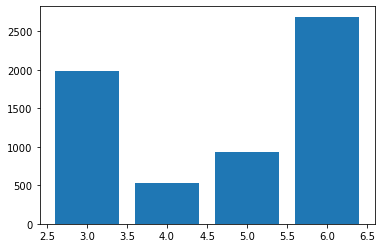

In [149]:
#คำถาม
dataQ8 = num8['Q8'].value_counts()

fig, ax = plt.subplots()
ax.bar(dataQ8.index, dataQ8.values)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

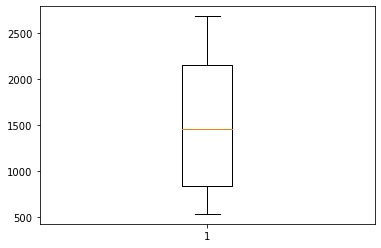

In [150]:
plt.boxplot(dataQ8)
plt.show

In [151]:
QA_a2.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
1029  ใช้สิทธิ์ทางศาลเพื่อฟ้องขอแบ่งที่มีขั้นตอนอย่า...   
1680  ตอนนี้ผมแยกกันอยู่กับภรรยามาแล้วปีแต่ยังไม่หย่...   
955   คืออยากทราบเกี่ยวกับขั้นตอนการเปลี่ยนนามสกุลลู...   
1270  ขอบพระคุณมากคะที่ตอบเรื่องการโอนที่ดินให้ดิฉัน...   
822   สืบเนื่องจากที่ดินที่บ้านหลังจากปู่ตายย่าโอนที...   
1344  ขอเรียนถามปัญหาดังนี้หากจะไปหย่าต้องเตรียมหลัก...   
655   คือว่าแฟนผมมีอายุปีส่วนผมมีอายุปีเราคนโดนทางบ้...   
636   ผมแต่งงานโดยจดทะเบียนสมรสถูกต้องตามกฎหมายทุกอย...   
1477  คือพ่อได้ทำสัญญาซื้อขายที่ดินกับน้องชายตายไปแล...   
1906  รบกวนขอคำปรึกษากรณีผู้ใหญ่ฝ่ายชายยกบ้านที่ติดห...   

                                                  คำตอบ  A8  Q8  
1029  คำถามของคุณกว้างมากไม่เจาะจงแต่ผมพยายามจะตอบให...   2   3  
1680  การกระทำของคุณภรรยาก็ฟ้องเรียกค่าทดแทนได้และกา...   2   3  
955   เมื่อบิดามารดาได้จดทะเบียนสมรสกันในภายหลังมีผล...   2   3  
1270  เจ้าหน้าที่ที่ดินเขาแนะนำไว้ก็ถูกต้องถ้าคุณพ่อ...   2   3  
822   หากที่พิพาทเป็นที่ดินมีหนังสือสำคัญแสดงกรรมสิท...   2   3  
1344  ยื่นคำร้องตามแบบครขอที่สำนักงานทะเบียนอำเภอหลั...   2   3  
655   การกระทำของท่านเป็นการกระทำความผิดอาญานอกจากเป...   2   3  
636   พฤติการณ์ที่ภริยามีชู้ย่อมเป็นเหตุฟ้องหย่าตามก...   2   3  
1477  ต้องดูข้อเท็จจริงว่าการที่น้องชายปลูกบ้านในที่...   2   3  
1906  มีสิทธิ์ในทันทีมีสิทธิ์เท่าที่ผ่อนชำระไปตามส่ว...   2   3

In [152]:
QA_a4.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
504  นายกขับรถถอยหลังด้วยความเร็วจนเป็นเหตุให้ชนรถน...   
358  วันหนึ่งรถเราถูกขโมยไปแล้วเราก็ได้ไปแจ้งความกั...   
61   สืบเนื่องมาจากผมเรียนวิชาคอมพิวเตอร์กราฟิกแล้ว...   
279  วันเกิดเหตุหลานสาวอายุปีอยู่บ้านคนเดียวแล้วมีน...   
430  กระผมได้รับซื้อโทรศัพท์มือถือจากคนขับแท็กซี่ที...   
511  รบกวนสอบถามท่านผู้รู้พอดีเมื่อวันจันทร์ที่ผ่าน...   
530  พนักงานสอบสวนแจ้งข้อเท็จจริงเกี่ยวกับการกระทำท...   
126  ลูกสาวเป็นนักศึกษาที่สถาบันแห่งหนึ่งไปเรียนปวช...   
408  อยากทราบเรื่องคดีความพยามยามฆ่าคือแฟนหนูนั่งกิ...   
364  ดิฉันมีบ้านที่เป็นตึกแถวหลังนึงซึ่งตอนนี้ข้างบ...   

                                                 คำตอบ  A8  Q8  
504  เห็นว่าไม่สามารถตอบได้ว่าใครถูกใครผิดการที่รถช...   4   4  
358  แม้เขาไม่ได้ลักทรัพย์คือรถของคุณแต่เขารับไว้ไม...   4   4  
61   การกระทำของเพื่อนที่นำเอารูปใบหน้าของท่านไปใส่...   4   4  
279  พฤติการณ์แห่งการกระทำความผิดของนายเก่งย่อมเป็น...   4   4  
430  ความรับผิดทางอาญาถ้าโทรศัพท์ทำตกไว้ก็เป็นทรัพย...   4   4  
511  เมาแล้วขับมีโทษตามพรบจราจรทางบกพศมาตราตรีมีโทษ...   4   4  
530  เมื่อถูกกล่าวและถูกฟ้องร้องดำเนินคดีก็จำเป็นต้...   4   4  
126  เมื่อพฤติการณ์ที่บุตรสาวของท่านถูกคู่กรณีร่วมก...   4   4  
408  จากข้อเท็จจริงคงเป็นการพยายามฆ่าคงได้ลดโทษหนึ่...   4   4  
364  ถ้าบ้านทรุดตัวจนประตูหน้าต่างปิดเปิดไม่ได้ก็เข...   4   4

In [153]:
QA_a6.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
356  บริษัทปิดกิจการสาขาสาขาที่จ่ายเต็มสาขาที่จ่ายเ...   
845  วันนี้มีลูกจ้างโทรศัพท์มาสอบถามว่าตนเองได้รับอ...   
456  ผมทำงานเป็นครูโรงเรียนเอกชนแห่งหนึ่งผมจบบธบและ...   
468  ผมได้สัมภาษณ์งานหลายบริษัทแล้วมีบริษัทแห่งนึงเ...   
390  โดยปกติตอนนี้บริษัทปิดกิจการเมื่อวันที่กันยายน...   
554  ถ้าพนักงานเสียชีวิคทราบว่าไม่ต้องจ่ายเงินชดเชย...   
174  หนูมีเรื่องอยากจะถามว่าหนูได้ทำงานเป็นงานเกี่ย...   
393  ดิฉันเขียนใบลาออกจากงานล่วงหน้าเดือนตามกฏหมายก...   
855  คือว่าหนูมีข้อคำถามอยากจะทราบสักหน่อยอ่ะในกรณี...   
803  เรื่องโดยใจความสำคัญมีดังนี้วันที่พฤศจิกายนเรา...   

                                                 คำตอบ  A8  Q8  
356  ลูกจ้างที่ปฏิบัติงานให้แก่บริษัทนายจ้างสาขาที่...   6   5  
845  ตามพระราชบัญญัติประกันสังคมพศไม่มีบทบัญญัติใดท...   6   5  
456  เมื่อท่านเป็นผู้ซึ่งตกลงทำงานให้นายจ้างโดยรับค...   6   5  
468  สัญญาจ้างเป็นสัญญาไม่ว่าเป็นหนังสือหรือด้วยวาจ...   6   5  
390  กรณีที่นายจ้างไม่จ่ายค่าชดเชยตามกฎหมายเนื่องจา...   6   5  
554  บริษัทนายจ้างสามารถกระทำการดังกล่าวได้เพื่อเป็...   6   5  
174  หากท่านได้ประสงค์ขอลาออกกับนายจ้างเองท่านย่อมไ...   6   5  
393  กรณีสัญญาจ้างไม่มีกำหนดระยะเวลาการจ้างเมื่อท่า...   6   5  
855  ยังไม่ต้องแจ้งหรอกลองทำหนังสือถึงอธิการดูอาจจะ...   6   5  
803  คำถาม“อยากทราบว่าทางทนายพรมองเคสนี้เป็นอย่างไร...   6   5

In [154]:
QA_a7.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
2539  ผมโดนชวนให้ร่วมหุ้นโดยอ้างว่าเป็นการร่วมกันลงท...   
217   ดิฉันเป็นลูกหนี้ธนาคารกู้เพื่อที่อยู่อาศัยผ่อน...   
2037  โจทก์ชนะคดีผลประโยชน์ในที่ดินกับจำเลยโดยโจทก์ไ...   
2078  คือดิฉันเดือดร้อนเงินมากไม่รู้ทำไงติดแบ็คลิสด้...   
1107  สัญญาสินเชื่อเงินกู้ผมเรียกตามหัวเอกสารเมื่อวั...   
2028  หนูมีเรื่องรบกวนขอคำปรึกษาก่อนอื่นหนูขอเล่าคร่...   
1689  เพื่อนก็ได้โฉลดที่ดินปลอมเหมือนกันน้องเค้าเขีย...   
1778  ผมสามารถมอบอำนาจให้คนอื่นไปเบิกเงินจากแคชเชียร...   
2653  สอบถามเรื่องเช่าชื้อรถยนต์มีเพื่อนมาดาวล์รถให้...   
1235  การ้เงินนอกระบบที่มีการเก็บดอกเบี้ยมากกว่าร้อย...   

                                                  คำตอบ  A8  Q8  
2539  แจ้งข้อหาฉ้อโกงไว้ไม่ต้องถอนแจ้งความถ้าอัยการส...   7   6  
217   กรณีของท่านเมื่อต้องการที่จะยื่นขอประนอมหนี้เพ...   7   6  
2037  สัญญาประนีประนอมเมื่อโจทก์ผิดสัญญาโดยการสร้างร...   7   6  
2078  ถ้ายอมส่งงวดไปโดยไม่ผิดนัดก็คงไม่มีปัญหาอะไรแต...   7   6  
1107  ถามมาเป็นข้อก็จะตอบเป็นข้อเลยตอบข้อ๑ปกติการทำน...   7   6  
2028  คำพิพากษาการบังคับคดีเมื่อผิดนัดการชำระหนี้เมื...   7   6  
1689  ถ้าแจ้งตำรวจก็คงดำเนินการตามขั้นตอนของกฎหมายคื...   7   6  
1778  ได้นะก็ทำหนังสือมอบอำนาจระบุว่าให้ใครไปทำอะไรอ...   7   6  
2653  การเช่าซื้อแม้เพื่อนเป็นผู้จ่ายเงินดาวน์แต่ถ้า...   7   6  
1235  การเรียกดอกเบี้ยเกินกว่าร้อยละ๑๕ต่อปีทำให้การเ...   7   6

> ### Topic Number = 7

- Anwering

In [156]:
lda_tfidf_a7 = LatentDirichletAllocation(7, random_state=0)
lda_tfidf_a7.fit(t_feat_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=7, random_state=0)

In [157]:
pyLDAvis.sklearn.prepare(lda_tfidf_a7, c_feat_a, cvec_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.129300 -0.080994       1        1  34.100044
1     -0.073883  0.023273       2        1  20.727325
5     -0.102219  0.030293       3        1  16.460205
2      0.009431 -0.114444       4        1  14.817591
4     -0.017995  0.158127       5        1   7.471493
3      0.152322 -0.096106       6        1   5.929202
0      0.161644  0.079850       7        1   0.494140, topic_info=           Term         Freq        Total Category  logprob  loglift
4430        นาย  2220.000000  2220.000000  Default  30.0000  30.0000
5748       พนง.  1743.000000  1743.000000  Default  29.0000  29.0000
4824       บุตร  1960.000000  1960.000000  Default  28.0000  28.0000
4056     ที่ดิน  2794.000000  2794.000000  Default  27.0000  27.0000
1578    ความผิด  1320.000000  1320.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
8216        สมา     1.752484    14.643168   Topic7  -7.3442   3.1872
2692  ซอฟต์แวร์     1.261042    10.455736   Topic7  -7.6733   3.1949
2648   ช่วยดูแล     1.465703    16.999669   Topic7  -7.5229   2.8592
3015      ด่าทอ     1.321938    19.801346   Topic7  -7.6262   2.6035
3472        ตู้     1.338918    29.669178   Topic7  -7.6134   2.2119

[434 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
0          1  0.081626          
0          2  0.081626          
0          3  0.081626          
0          4  0.081626          
0          5  0.081626          
...      ...       ...       ...
12551      2  0.006291  ไล่เบี้ย
12551      3  0.006291  ไล่เบี้ย
12551      4  0.006291  ไล่เบี้ย
12551      5  0.006291  ไล่เบี้ย
12551      6  0.006291  ไล่เบี้ย

[2267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 6, 3, 5, 4, 1])

In [158]:
topic_valuesA7 = lda_tfidf_a7.transform(t_feat_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [163]:
Data['Topic_A7'] = topic_valuesA7.argmax(axis=1)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
Data['A7'] = Data['Topic_A7']+1

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [165]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  Topic_A7  A7  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...         6   7  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...         1   2  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...         1   2  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...         5   6  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...         3   4  
...                                                  ...       ...  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...         6   7  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...         6   7  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...         6   7  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...         5   6  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...         6   7  

[12696 rows x 4 columns]

In [166]:
Data.drop(['Topic_A7'], 1, inplace=True)
#Data.drop(['Topic_Q7', 'A7', 'A8', 'Q8'], 1, inplace=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  A7  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...   7  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...   2  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...   6  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...   4  
...                                                  ...  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...   7  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...   7  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   6  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   7  

[12696 rows x 3 columns]

- Question

In [168]:
lda_tfidf7 = LatentDirichletAllocation(7, random_state=0)
lda_tfidf7.fit(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=7, random_state=0)

In [169]:
pyLDAvis.sklearn.prepare(lda_tfidf7, c_feat, cvec)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.141338  0.057409       1        1  29.325019
2      0.119351 -0.149566       2        1  22.292837
6      0.055883  0.043304       3        1  18.720491
4      0.017627  0.092898       4        1  14.516481
3      0.019927 -0.010761       5        1  14.233927
0     -0.177487 -0.017020       6        1   0.460389
1     -0.176640 -0.016264       7        1   0.450855, topic_info=             Term         Freq        Total Category  logprob  loglift
7352          ผัว  2330.000000  2330.000000  Default  30.0000  30.0000
5512       ที่ดิน  3152.000000  3152.000000  Default  29.0000  29.0000
6347       บริษัท  2964.000000  2964.000000  Default  28.0000  28.0000
8191          พ่อ  2451.000000  2451.000000  Default  27.0000  27.0000
10151         ลูก  1832.000000  1832.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
15657      แจกแจง     1.058388     9.884350   Topic7  -7.9072   3.1676
5371         ทารก     1.074541    10.725095   Topic7  -7.8920   3.1011
15699         แดง     1.551505   193.854692   Topic7  -7.5247   0.5739
13792  เช่าทรัพย์     1.138581    19.031583   Topic7  -7.8341   2.5855
29             ++     1.078522    15.241927   Topic7  -7.8883   2.7533

[459 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
0          1  0.114718      
0          2  0.114718      
0          3  0.114718      
0          4  0.114718      
0          5  0.114718      
...      ...       ...   ...
17252      1  0.010198  ไอซ์
17252      2  0.005099  ไอซ์
17252      3  0.973948  ไอซ์
17252      4  0.005099  ไอซ์
17252      5  0.005099  ไอซ์

[2031 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 7, 5, 4, 1, 2])

In [170]:
topic_valuesQ7 = lda_tfidf7.transform(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
Data['Topic_Q7'] = topic_valuesQ7.argmax(axis=1)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [172]:
Data['Q7'] = Data['Topic_Q7']+1

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
Data.drop(['Topic_Q7'], 1, inplace=True) 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  A7  Q7  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...   7   6  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2   3  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...   2   5  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...   6   7  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...   4   7  
...                                                  ...  ..  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7   6  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...   7   4  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...   7   6  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   6   3  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   7   4  

[12696 rows x 4 columns]

#### Number = 1

In [175]:
topic_a71 = Data[Data['A7'] == 1].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
topic_a71.groupby('Q7').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q7
3    5
4    2
5    2
6    3
7    6
dtype: int64

In [178]:
#เลือกเลข 7
QA_a71 = topic_a71[topic_a71['Q7'] == 7].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 2

In [179]:
topic_a72 = Data[Data['A7'] == 2].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [180]:
topic_a72.groupby('Q7').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q7
1       4
2       4
3    1116
4     587
5      88
6     224
7     292
dtype: int64

In [181]:
#เลือกเลข 3
QA_a72 = topic_a72[topic_a72['Q7'] == 3].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 3

In [182]:
topic_a73 = Data[Data['A7'] == 3].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [183]:
topic_a73.groupby('Q7').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q7
1       3
2       1
3     215
4      99
5     127
6     352
7    1118
dtype: int64

In [184]:
#เลือกเลข 7 
QA_a73 = topic_a73[topic_a73['Q7'] == 7].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 4

In [185]:
topic_a74 = Data[Data['A7'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [186]:
topic_a74.groupby('Q7').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q7
2      1
3     28
4     72
5     56
6    119
7    379
dtype: int64

In [187]:
#เลือกเลข 7
QA_a74 = topic_a74[topic_a74['Q7'] == 7].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 5

In [188]:
topic_a75 = Data[Data['A7'] == 5].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [189]:
topic_a75.groupby('Q7').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q7
1      1
3    794
4     29
5     18
6     84
7     35
dtype: int64

In [190]:
#เลือกเลข 3 
QA_a75 = topic_a75[topic_a75['Q7'] == 3].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 6

In [191]:
topic_a76 = Data[Data['A7'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
topic_a76.groupby('Q7').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q7
2      1
3    172
4    410
5    884
6    205
7     78
dtype: int64

In [193]:
#เลือกเลข 5 
QA_a76 = topic_a76[topic_a76['Q7'] == 5].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 7

In [194]:
topic_a77 = Data[Data['A7'] == 7].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
topic_a77.groupby('Q7').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q7
1       5
2       7
3     528
4     619
5     613
6    2745
7     565
dtype: int64

In [196]:
#เลือกเลข 6
QA_a77 = topic_a77[topic_a77['Q7'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> - คัดเลือกเหลือ Number 2 , 3 ,6 และ 7

> - จำนวน 4 Classes


In [197]:
len(QA_a72) + len(QA_a73) + len(QA_a76) + len(QA_a77) 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5863

In [198]:
num7 = pd.concat([QA_a72, QA_a73, QA_a76, QA_a77],axis=0).reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [199]:
num7.groupby('A7').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A7
2    1116
3    1118
6     884
7    2745
dtype: int64

# Visualization

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 4 artists>

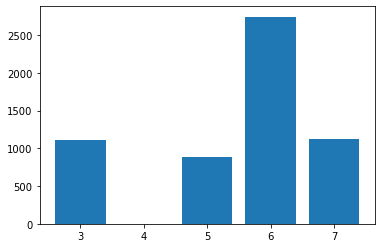

In [200]:
#คำถาม
dataQ7 = num7['Q7'].value_counts()

fig, ax = plt.subplots()
ax.bar(dataQ7.index, dataQ7.values)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

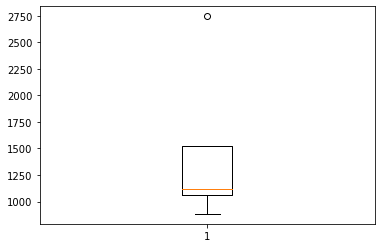

In [201]:
plt.boxplot(dataQ7)
plt.show

In [202]:
QA_a72.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
567  ดิฉันมีแฟนชาวต่างชาติจะเดินเรื่องเอาพวกเราทั้ง...   
654  ผมได้มีลูกชายคนแต่ข้อมูลพ่อเด็กในสูติบัตรเป็นช...   
741  ญาติประสบอุบัติเหตุทางรถยนต์จนเสียชีวิตฝ่ายเรา...   
104  เนื่องจากพ่อและแม่ได้โอนกรรมสิทธิ์บ้านและที่ดิ...   
564  คือว่าแฟนผมเป็นผู้ชายเขาอายุปีเกิดส่วนผมอายุปี...   
933  ถ้าผู้อื่นมาอาศัยอยู่ในบ้านและย้ายเข้ามาอยู่ใน...   
54   จะทำอย่างไรให้ทะเบียนสมรสเป็นโมฆะเนื่องจากคุณพ...   
114  เนื่องจากตอนปู่มีชีวิตอยู่มีห้องเช่าห้องแบ่งให...   
840  ในกรณีที่เราได้ที่ดินเป็นสินสอดและยกให้เจ้าของ...   
313  ผมมีข้อสงสัยอยู่ข้ออยากหายสงสัยอ่ะคัฟในกรณีที่...   

                                                 คำตอบ  A7  Q7  
567  กรณีการหย่าโดยความยินยอมแล้วสามีภริยาได้ทำความ...   2   3  
654  ท่านต้องดำเนินการยื่นคำฟ้องขอให้ศาลพิพากษาให้ท...   2   3  
741  กรณีตามปัญหาการทำให้ญาติถึงตายนั้นค่าสินไหมทดแ...   2   3  
104  กรณีทีพ่อแม่ของท่านได้โอนกรรมสิทธิ์บ้านและที่ด...   2   3  
564  การรับบุตรบุญธรรมจะกระทำได้โดยชอบด้วยกฎหมายต้อ...   2   3  
933  การเป็นเจ้าบ้านในทะเบียนบ้านไม่ก่อให้เกิดสิทธิ...   2   3  
54   ต้องฟ้องหย่าตามปพพมาตราตัวบทกฎหมายอ้างอิงประมว...   2   3  
114  ขณะที่คุณปู่ยังมีชีวิตอยู่นั้นได้แบ่งห้องเช่าจ...   2   3  
840  ถ้าที่ดินที่ให้เป็นสินสอดมีการจดทะเบียนการโอนถ...   2   3  
313  เมื่อสามีภรรยาคู่นี้ไม่ได้จดทะเบียนสมรสเป็นสาม...   2   3

In [203]:
QA_a73.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
667  แฟนโดนจับครอบครองเพื่อจำหน่ายยาไอซ์กรัมอยากทรา...   
369  น้องชายดิฉันโดนข้อหาอนาจารตอนนี้ฝากขังอยู่เรือ...   
850  พอดีวันนั้นไปทำงานแถวประชาอุทิศโดยไม่ได้เอาบัต...   
393  รบกวนถามหน่อยว่าน้องสาวโดนล่อซื้อเบอร์แบงค์จำน...   
631  สอบถามหน่อยพอดีผมโดนจับตอนกำลังจะไปเที่ยวผับโด...   
426  ขอคำแนะนำคือเรื่องมีอยู่ว่าสามีดิฉันถูกซัดทอดใ...   
121  รบกวนช่วยหนูหน่อยนะพอดีว่าน้องสาวถูกจับข้อหาคด...   
169  น้องโดนจับเมื่อวันที่พฤศจิกายนคดีร่วมกันลักทรั...   
561  กรณีของกลางเป็นน้ำต้มพืชใบกระท่อมคำถามคือการส่...   
395  ด้วยดิฉันได้ถูกกล่าวหาโดยการลงชื่อจริงนามสกุลจ...   

                                                 คำตอบ  A7  Q7  
667  ยาไอซ์ถือเป็นยาเสพติดให้โทษประเภทที่๑และมีโทษส...   3   7  
369  การที่ศาลจะเบิกตัวน้องชายซึ่งเป็นจำเลยมาขึ้นศา...   3   7  
850                    ตอบแล้วโทษปรับไม่เกินสองร้อยบาท   3   7  
393  กรณีตามปัญหาของท่านดังกล่าวเกี่ยวด้วยการที่น้อ...   3   7  
631  การถูกตั้งข้อหาว่ามียาเสพติดให้โทษประเภท๑ไว้ใน...   3   7  
426  คำซัดทอดของผู้ต้องหาที่ดังกล่าวถือว่าเป็นพยานซ...   3   7  
121  ความผิดฐานจำหน่ายหรือมีไว้ในครอบครองเพื่อจำหน่...   3   7  
169  ร่วมกันลักทรัพย์ลงโทษประมาณปีหากรับสารภาพเหลิอ...   3   7  
561  ของกลางต้องมีในบันทึกการจับกุมและมอบสำเนาให้ผู...   3   7  
395  เมื่อท่านได้ร้องทุกข์ต่อพนักงานสอบสวนให้ดำเนิน...   3   7

In [204]:
QA_a76.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
86   ทำงานที่นี่มาปีเต็มโดยไม่มีสัญญาจ้างและไม่ได้ท...   
214  ไปร้องเรียนหน่วยงานแห่งหนึ่งว่าพนักงานปฏิบัติง...   
818  บริษัทเดิมจ้างงานต่อหลังเกษียณโดยทำสัญญาใหม่มี...   
821  ผมทำงานที่สหกรณ์การเกษตรเป็นนิติบุคคลเป็นเวลาป...   
157  คะดิฉันเป็นพนักงานบเอกชนแห่งหนึ่งเมื่อเดือนก่อ...   
525  บริษัทที่ผมทำงานมีมีปัญหาด้านการเงินจึงต้องการ...   
846  รับแม่บ้านมาทำงานบ้านแม่บ้านขอเข้าประกันสังคมเ...   
116  ผมทำงานอยู่โรงแรมแห่งหนึ่งในจังหวัดนครราชสีมาป...   
204  ผมได้ไปเปิดเว็บเว็บหนึ่งซึ่งเกียวกับค่าขดเชยพิ...   
613  ขอนุญาตสอบถามเพื่อเป็นความรู้นะคะกรณีเลิกจ้างพ...   

                                                 คำตอบ  A7  Q7  
86   ท่านสามารถร้องเรียนได้ที่สำนักงานสวัสดิการและค...   6   5  
214  มีกฎหมายที่คุ้มครองเกี่ยวกับความผิดฐานเปิดเผยค...   6   5  
818  นายจ้างจะจ่ายค่าชดเชยก็ต่อเมื่อเลิกจ้างลูกจ้าง...   6   5  
821  ตามพรบคุ้มครองแรงงานระบุเพียงว่าลูกจ้างที่ถูกเ...   6   5  
157  กรณีที่ท่านได้ยอมเซ็นต์ใบลาออกดังกล่าวตามคำแจ้...   6   5  
525  นายจ้างต้องปฏิบัติต่อลูกจ้างให้ถูกต้องตามสิทธิ...   6   5  
846  การประกันสังคมเดิมแม่บ้านก็เป็นลูกจ้างตามมพรบป...   6   5  
116  ตามกฎหมายคุ้มครองแรงงานแล้วได้กำหนดให้นายจ้างต...   6   5  
204  ถือว่าเป็นกรณีที่นายจ้างย้ายสถานประกอบกิจการไป...   6   5  
613  กฎหมายคุ้มครองแรงงานมีวัตถุประสงค์ในการคุ้มครอ...   6   5

In [205]:
QA_a77.sample(n = 10)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
2074         สอบถามเรื่องการลงลายมื่อชื่อบนสัญญาเงินกู้   
1631  ผมสั่งจ่ายเช็คโดยลงรายมือชื่อบนเช็คตามปกติต่อม...   
2381  ขับรถมอเตอร์ไซค์แล้วแซงขวาไปชนอีกคันฝ่ายนั้นบา...   
190   เนื่องจากว่าเมื่อเดือนมกราคมรถยนต์ที่เราได้ทำก...   
2670  ผมกู้สร้างบ้านธนาคารออมสินและกู้ต่อเติมสํญญาแต...   
1088  รบกวนสอบถามพ่อของดิฉันได้เช่าซื้อรถยนต์และยังผ...   
1629  ปัญหาเกี่ยวกับหนี้สินนอกระบบโดยที่เจ้าหนี้คอยท...   
2638  เรียนทนายความดิฉันมีเรื่องที่จะปรึกษาดังนี้เมื...   
783   หลักทรัพย์ประกันตัวถ้าไม่มีหลักทรัพย์แล้วเช่าห...   
1354  เขาเป็นแม่บ้านทำงานด้วยกันเลยสงสารเขาบอกว่าพ่อ...   

                                                  คำตอบ  A7  Q7  
2074  หลักฐานการกู้ยืมเงินสาระสำคัญคือลายมือชื่อผู้ก...   7   6  
1631  ถ้าไม่มีเจตนาจ่ายเช็คเพื่อไม่สามารถให้ขึ้นได้ห...   7   6  
2381  การขับรถโดยประมาทเป็นเหตุให้ผู้อื่นได้รับอันตร...   7   6  
190   บริษัทไฟแนนซ์จะดำเนินคดีกับคุณในฐานความผิดสัญญ...   7   6  
2670  ขอแก้เช็คบรูโรค้างชำระเกินวันแสดงว่าผมค้างชำระ...   7   6  
1088  การรับมรดกในกรณีที่ไฟแนนซ์จะมาเอารถคืนจะทำอย่า...   7   6  
1629  การเป็นบุคคลล้มละลายมีคนเปรียบเปรยว่าเสมือนถูก...   7   6  
2638  ลูกหนี้ตัวจริงคุณคือลูกหนี้ตัวจริงมีหน้าที่ต้อ...   7   6  
783   กรณีที่ผู้ร้องขอประกันไม่สามารถจัดหาหลักประกัน...   7   6  
1354  หลักฐานการ้ยืมตามที่บอกมาคงเพียงพอสำหรับการฟ้อ...   7   6

> ### Topic Number = 6

- Anwering 

In [206]:
lda_tfidf_a6 = LatentDirichletAllocation(6, random_state=0)
lda_tfidf_a6.fit(t_feat_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6, random_state=0)

In [207]:
pyLDAvis.sklearn.prepare(lda_tfidf_a6, c_feat_a, cvec_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.136948  0.035229       1        1  34.278585
5      0.116305  0.027239       2        1  25.680904
2     -0.033345 -0.100678       3        1  19.135570
3     -0.047956 -0.146677       4        1  14.408391
4     -0.001617  0.077698       5        1   5.836178
0     -0.170336  0.107189       6        1   0.660372, topic_info=                     Term         Freq        Total Category  logprob  loglift
4430                  นาย  2275.000000  2275.000000  Default  30.0000  30.0000
5748                 พนง.  1792.000000  1792.000000  Default  29.0000  29.0000
4824                 บุตร  2105.000000  2105.000000  Default  28.0000  28.0000
4056               ที่ดิน  2955.000000  2955.000000  Default  27.0000  27.0000
8396                สัญญา  2755.000000  2755.000000  Default  26.0000  26.0000
...                   ...          ...          ...      ...      ...      ...
187       กระทรวงยุติธรรม     2.547919    35.111679   Topic6  -7.2600   2.3969
12240            ในประเทศ     2.696838    86.751172   Topic6  -7.2032   1.5492
7395              ลดหย่อน     2.508071    48.178069   Topic6  -7.2757   2.0647
4653   บริษัทข้อมูลเครดิต     2.384784    27.088978   Topic6  -7.3261   2.5901
9059                 หลัก     2.384236   194.437744   Topic6  -7.3264   0.6189

[398 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
0          1  0.158493                    
0          2  0.079246                    
0          3  0.079246                    
0          4  0.079246                    
0          5  0.079246                    
...      ...       ...                 ...
12510      2  0.090328  ไม่เหลือบ่ากว่าแรง
12510      3  0.090328  ไม่เหลือบ่ากว่าแรง
12510      4  0.090328  ไม่เหลือบ่ากว่าแรง
12510      5  0.090328  ไม่เหลือบ่ากว่าแรง
12510      6  0.361313  ไม่เหลือบ่ากว่าแรง

[1765 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 3, 4, 5, 1])

In [208]:
topic_valuesA6 = lda_tfidf_a6.transform(t_feat_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [209]:
Data['Topic_A6'] = topic_valuesA6.argmax(axis=1)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [210]:
Data['A6'] = Data['Topic_A6']+1

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [211]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  A7  Q7  Topic_A6  A6  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...   7   6         5   6  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2   3         1   2  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...   2   5         1   2  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...   6   7         3   4  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...   4   7         3   4  
...                                                  ...  ..  ..       ...  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   7   6         1   2  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...   7   4         1   2  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...   7   6         3   4  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   6   3         5   6  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   7   4         1   2  

[12696 rows x 6 columns]

- Question 

In [212]:
lda_tfidf6 = LatentDirichletAllocation(6, random_state=0)
lda_tfidf6.fit(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6, random_state=0)

In [213]:
pyLDAvis.sklearn.prepare(lda_tfidf6, c_feat, cvec)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.149443  0.069986       1        1  34.925848
3      0.074294  0.025178       2        1  30.520370
2      0.117690 -0.140927       3        1  23.164549
4     -0.017205  0.080571       4        1  10.385633
0     -0.163439 -0.017285       5        1   0.522483
1     -0.160782 -0.017523       6        1   0.481117, topic_info=            Term         Freq        Total Category  logprob  loglift
6347      บริษัท  2725.000000  2725.000000  Default  30.0000  30.0000
5512      ที่ดิน  3216.000000  3216.000000  Default  29.0000  29.0000
7352         ผัว  2274.000000  2274.000000  Default  28.0000  28.0000
8191         พ่อ  2424.000000  2424.000000  Default  27.0000  27.0000
10151        ลูก  1796.000000  1796.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
15703        แตก     3.109562   156.997900   Topic6  -6.8944   1.4151
14904  เลือกตั้ง     1.424240    57.796333   Topic6  -7.6753   1.6335
8408     ภาษาไทย     1.169404    25.716558   Topic6  -7.8724   2.2462
11033      สมาคม     1.144679    29.847596   Topic6  -7.8938   2.0758
2164    ความหมาย     1.144797    45.684778   Topic6  -7.8937   1.6503

[382 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
0          1  0.241861      
0          2  0.241861      
0          3  0.241861      
0          4  0.120930      
0          5  0.241861      
...      ...       ...   ...
17263      1  0.251579  ไฮโซ
17263      2  0.251579  ไฮโซ
17263      3  0.251579  ไฮโซ
17263      4  0.251579  ไฮโซ
17263      5  0.125790  ไฮโซ

[1366 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 5, 1, 2])

In [214]:
topic_valuesQ6 = lda_tfidf6.transform(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [215]:
Data['Topic_Q6'] = topic_valuesQ6.argmax(axis=1)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [216]:
Data['Q6'] = Data['Topic_Q6']+1

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [217]:
Data.drop(['Topic_Q6', 'Topic_A6', 'A7', 'Q7'], 1, inplace=True) 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
Data

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0      ชำระหนี้บัตรเครดิตหมดไปสามปีแล้วทำไมยังไม่สามา...   
1      หนูมีปัญหาว่าตอนนี้มีลูกกับแฟนด้วยกันคนแต่ไม่ไ...   
2      ขอรบกวนอาจารย์พอดีผมเรียนอังกฤษกฎหมายอาจารย์ให...   
3      เจอทนายความใช้ความรู้ที่เรียนมาในทางรังแกคนแก่...   
4      เหตุเกิดเมื่อคืนวันทีทกคมีคนปาขวดแก้วเข้ามาในบ...   
...                                                  ...   
12691  เรียนทนายคลายทุกข์คนค้ำซึ่งเป็นภรรยาเก่าได้จดท...   
12692  เกี่ยวกับเรื่องสุนัขเหาและส่งกลิ่นรบกวนเกี่ยวก...   
12693  สวัดดีหน่อยว่าถ้าศาลตันสินแล้วคดีอาญาแต่ทางผู้...   
12694  ได้นำเงินไถ่ถอนไปวางไว้ที่สำนักงานวางทรัพย์แล้...   
12695  คุณพ่อได้ทำกิจการโดยให้บริษัทเป็นคนสร้างให้โดย...   

                                                   คำตอบ  A6  Q6  
0      หากคุณชำระหนี้หมดให้ติดต่อไปที่สถาบันการเงินเจ...   6   6  
1      จากข้อเท็จจริงของคุณนั้นเมื่อคุรไม่ได้จดทะเบีย...   2   3  
2      การถือครองเป็นไปตามประมวลกฎหมายที่ดินพศหมวดตั้...   2   3  
3      สิทธิและเสรีภาพของคนเท่าเทียมกันแต่การใช้สิทธิ...   4   4  
4      หากคุณเห็นว่าบุคคลนั้นกระทำความผิดจริงคุณต้องด...   4   4  
...                                                  ...  ..  ..  
12691  ลูกหนี้ตัวจริงในเมื่อไปทำสัญญากันไว้ให้ภรรยาคร...   2   6  
12692  หากสิ่งเหล่านี้ที่เราทำเพื่อนบ้านซึ่งอาจมีแนวค...   2   4  
12693  คือเราได้เอาเงินไปวางที่ศาลแล้วพอผู้เสียงรู้ผู...   4   4  
12694  เมื่อได้ใช้สิทธิไถ่ภายในกำหนดเวลาไถ่แล้วกรรมสิ...   6   3  
12695  ณปัจจุบันที่ดินและสิ่งปลูกสร้างเป็นทรัพย์สินขอ...   2   4  

[12696 rows x 4 columns]

#### Number = 1

In [219]:
topic_a61 = Data[Data['A6'] == 1].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
topic_a61.groupby('Q6').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q6
3     8
4    15
5     4
6     8
dtype: int64

In [221]:
#เลือกเลข 4 
QA_a1 = topic_a61[topic_a61['Q6'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 2

In [222]:
topic_a62 = Data[Data['A6'] == 2].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
topic_a62.groupby('Q6').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q6
1       4
2       5
3    2364
4     675
5      73
6    1038
dtype: int64

In [224]:
#เลือกเลข 3 
QA_a2 = topic_a62[topic_a62['Q6'] == 3].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 3

In [225]:
topic_a63 = Data[Data['A6'] == 3].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [226]:
topic_a63.groupby('Q6').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q6
1       7
2       5
3     142
4     698
5     137
6    1363
dtype: int64

In [227]:
#เลือกเลข 6 
QA_a3 = topic_a63[topic_a63['Q6'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 4

In [228]:
topic_a64 = Data[Data['A6'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [229]:
topic_a64.groupby('Q6').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q6
1       6
2       2
3      97
4    1220
5      77
6     600
dtype: int64

In [230]:
#เลือกเลข 4 
QA_a4 = topic_a64[topic_a64['Q6'] == 4].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 5

In [231]:
topic_a65 = Data[Data['A6'] == 5].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [232]:
topic_a65.groupby('Q6').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q6
1      4
2      1
3    232
4    209
5     51
6    577
dtype: int64

In [233]:
#เลือกเลข 6
QA_a5 = topic_a65[topic_a65['Q6'] == 3].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Number = 6

In [234]:
topic_a66 = Data[Data['A6'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [235]:
topic_a66.groupby('Q6').size()

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q6
2       8
3     127
4     911
5     964
6    1064
dtype: int64

In [236]:
#เลือกเลข 6
QA_a6 = topic_a66[topic_a66['Q6'] == 6].reset_index(drop=True)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> - คัดเลือกเหลือ Number 2 , 3 และ 4

> - จำนวน 3 Classes



In [237]:
len(QA_a2) + len(QA_a3) + len(QA_a4) 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4947

****************************************************ไม่ผ่านเงื่อนไข******************************************************************************************